# Analyse des ventes d'une librairie.

* Importation des bibliotèques.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import chi2_contingency
from scipy.stats import chi2

* Importation des fichiers.

In [2]:
df_customers = pd.read_csv(r"C:\Users\Utilisateur\OneDrive\Bureau\customers.csv")
df_products = pd.read_csv(r"C:\Users\Utilisateur\OneDrive\Bureau\products.csv")
df_transactions = pd.read_csv(r"C:\Users\Utilisateur\OneDrive\Bureau\transactions.csv")

## Nettoyage des données:

* Afficher la table:

In [3]:
df_customers

,client_id,sex,birth
0,c_4410,f,1967
1,c_7839,f,1975
2,c_1699,f,1984
3,c_5961,f,1962
4,c_5320,m,1943
...,...,...,...
8618,c_7920,m,1956
8619,c_7403,f,1970
8620,c_5119,m,1974
8621,c_5643,f,1968


* Vérifier que les types de données soient cohérentes:

In [4]:
df_customers.dtypes

client_id    object
sex          object
birth         int64
dtype: object

In [5]:
df_customers['birth']=df_customers['birth'].astype(object)

*Nous avons modifié le type de ces données et ainsi celles ci ne s'additionneront pas entre elles.*

* Afficher pour la table les valeurs suivantes : nombre, moyenne, écart type, valeur minimum, 1er,2ème et 3ème quartile puis valeur la plus grande:

In [6]:
df_customers.describe()

,client_id,sex,birth
count,8623,8623,8623
unique,8623,2,76
top,c_4410,f,2004
freq,1,4491,440


* Observer les colonnes qui devront être modifier/supprimer ou non:

In [7]:
df_customers.isna().sum()

client_id    0
sex          0
birth        0
dtype: int64

* S’assurer qu’il n’y a pas de lignes en doublons:

In [8]:
df_customers.duplicated(['client_id']).sum()

0

* Procédons de meme pour les autres tables:

In [9]:
df_products

,id_prod,price,categ
0,0_1421,19.99,0
1,0_1368,5.13,0
2,0_731,17.99,0
3,1_587,4.99,1
4,0_1507,3.99,0
...,...,...,...
3282,2_23,115.99,2
3283,0_146,17.14,0
3284,0_802,11.22,0
3285,1_140,38.56,1


In [10]:
df_products.dtypes

id_prod     object
price      float64
categ        int64
dtype: object

In [11]:
df_products['categ']=df_products['categ'].astype(object)

In [12]:
df_products.describe()

,price
count,3287.000000
mean,21.856641
std,29.847908
min,-1.000000
25%,6.990000
50%,13.060000
75%,22.990000
max,300.000000


* Afficher la ligne correspondant à la valeur minimum:

In [13]:
df_products.loc[df_products['price']==-1]

,id_prod,price,categ
731,T_0,-1.0,0


In [14]:
df_products.drop(df_products.loc[df_products['price']==-1].index, inplace=True)
df_products

,id_prod,price,categ
0,0_1421,19.99,0
1,0_1368,5.13,0
2,0_731,17.99,0
3,1_587,4.99,1
4,0_1507,3.99,0
...,...,...,...
3282,2_23,115.99,2
3283,0_146,17.14,0
3284,0_802,11.22,0
3285,1_140,38.56,1


*Nous avons supprimé cette ligne car cette valeur etait une erreure. En effet celle ci représente un test et le prix négatif pourrait modifier le chiffre d'affaires.*

In [15]:
df_products.describe()

,price
count,3286.000000
mean,21.863597
std,29.849786
min,0.620000
25%,6.990000
50%,13.075000
75%,22.990000
max,300.000000


In [16]:
df_products.isna().sum()

id_prod    0
price      0
categ      0
dtype: int64

In [17]:
df_products.duplicated(['id_prod']).sum()

0

In [18]:
df_transactions

,id_prod,date,session_id,client_id
0,0_1518,2022-05-20 13:21:29.043970,s_211425,c_103
1,1_251,2022-02-02 07:55:19.149409,s_158752,c_8534
2,0_1277,2022-06-18 15:44:33.155329,s_225667,c_6714
3,2_209,2021-06-24 04:19:29.835891,s_52962,c_6941
4,0_1509,2023-01-11 08:22:08.194479,s_325227,c_4232
...,...,...,...,...
679527,0_1551,2022-01-15 13:05:06.246925,s_150195,c_8489
679528,1_639,2022-03-19 16:03:23.429229,s_181434,c_4370
679529,0_1425,2022-12-20 04:33:37.584749,s_314704,c_304
679530,0_1994,2021-07-16 20:36:35.350579,s_63204,c_2227


In [19]:
df_transactions.describe()

,id_prod,date,session_id,client_id
count,679532,679532,679532,679532
unique,3267,679371,342316,8602
top,1_369,test_2021-03-01 02:30:02.237413,s_0,c_1609
freq,2252,13,200,25488


* Afficher les lignes de tests: 

In [20]:
df_transactions[df_transactions.date.str.contains(r'test')]

,id_prod,date,session_id,client_id
3019,T_0,test_2021-03-01 02:30:02.237419,s_0,ct_0
5138,T_0,test_2021-03-01 02:30:02.237425,s_0,ct_0
9668,T_0,test_2021-03-01 02:30:02.237437,s_0,ct_1
10728,T_0,test_2021-03-01 02:30:02.237436,s_0,ct_0
15292,T_0,test_2021-03-01 02:30:02.237430,s_0,ct_0
...,...,...,...,...
657830,T_0,test_2021-03-01 02:30:02.237417,s_0,ct_0
662081,T_0,test_2021-03-01 02:30:02.237427,s_0,ct_1
670680,T_0,test_2021-03-01 02:30:02.237449,s_0,ct_1
671647,T_0,test_2021-03-01 02:30:02.237424,s_0,ct_1


*Nous pouvons supposer que les lignes de tests correspondent à la date d'ouverture du site de ventes en lignes.*

* Observons combien de lignes de tests nous avons:

In [21]:
df_transactions[df_transactions.date.str.contains(r'test')].count()

id_prod       200
date          200
session_id    200
client_id     200
dtype: int64

* Supprimer les lignes de tests: 

In [22]:
df_transactions=df_transactions.drop(df_transactions[df_transactions.date.str.contains(r'test')].index)
df_transactions

,id_prod,date,session_id,client_id
0,0_1518,2022-05-20 13:21:29.043970,s_211425,c_103
1,1_251,2022-02-02 07:55:19.149409,s_158752,c_8534
2,0_1277,2022-06-18 15:44:33.155329,s_225667,c_6714
3,2_209,2021-06-24 04:19:29.835891,s_52962,c_6941
4,0_1509,2023-01-11 08:22:08.194479,s_325227,c_4232
...,...,...,...,...
679527,0_1551,2022-01-15 13:05:06.246925,s_150195,c_8489
679528,1_639,2022-03-19 16:03:23.429229,s_181434,c_4370
679529,0_1425,2022-12-20 04:33:37.584749,s_314704,c_304
679530,0_1994,2021-07-16 20:36:35.350579,s_63204,c_2227


*Nous avons supprimé les lignes de tests car cela n'affectera pas les données sur le chiffre d'affaires, en effet ce ne sont pas des ventes.*

In [23]:
df_transactions.dtypes

id_prod       object
date          object
session_id    object
client_id     object
dtype: object

In [24]:
df_transactions['date'] = pd.to_datetime(df_transactions['date'])

In [25]:
df_transactions.dtypes

id_prod               object
date          datetime64[ns]
session_id            object
client_id             object
dtype: object

In [26]:
df_transactions.describe(datetime_is_numeric=True)

,date
count,679332
mean,2022-03-03 15:13:19.307389696
min,2021-03-01 00:01:07.843138
25%,2021-09-08 09:14:25.055994368
50%,2022-03-03 07:50:20.817730560
75%,2022-08-30 23:57:08.555173888
max,2023-02-28 23:58:30.792755


*Les ventes en lignes ont commencées le 03 Mars 2021, les tests ont bien eu lieu ce jour.*

In [27]:
df_transactions.isna().sum()

id_prod       0
date          0
session_id    0
client_id     0
dtype: int64

* Afficher les doublons:

In [28]:
df_transactions.duplicated(['client_id','id_prod',]).sum()

372259

Voyons quels sont ces doublons:

In [29]:
df_transactions.sort_values(by=['client_id','id_prod'], ascending=False).head(50)

,id_prod,date,session_id,client_id
54012,1_727,2022-05-21 17:40:50.856434,s_211960,c_999
118312,1_727,2021-11-21 17:40:50.856434,s_122996,c_999
209606,1_727,2023-01-21 17:40:50.856434,s_330231,c_999
252400,1_727,2022-07-21 17:40:50.856434,s_241673,c_999
369011,1_724,2022-01-19 09:10:14.900805,s_152063,c_999
52881,1_676,2023-02-10 23:59:59.414026,s_339757,c_999
163208,1_676,2021-07-10 23:59:59.414026,s_60625,c_999
169929,1_676,2022-11-10 23:59:59.414026,s_295726,c_999
488762,1_669,2022-01-16 23:40:14.387888,s_150872,c_999
296954,1_459,2022-05-11 10:00:53.303706,s_206890,c_999


In [30]:
df_transactions.sort_values(by=['session_id'], ascending=False).head(50)

,id_prod,date,session_id,client_id
599185,0_1604,2021-10-04 19:00:20.030388,s_99998,c_2795
48865,0_1411,2021-10-04 18:50:59.099942,s_99998,c_2795
633558,0_1572,2021-10-04 18:45:54.374885,s_99998,c_2795
504526,0_1197,2021-10-04 18:45:38.003516,s_99997,c_3521
218613,0_1475,2021-10-04 18:45:05.640783,s_99996,c_4900
671163,0_1609,2021-10-04 18:39:10.485474,s_99996,c_4900
85724,0_2231,2021-10-04 18:38:36.333661,s_99996,c_4900
508968,0_1362,2021-10-04 18:58:49.228317,s_99996,c_4900
541544,0_1784,2021-10-04 18:35:32.201073,s_99995,c_4170
67679,0_2060,2021-10-04 18:34:24.208113,s_99994,c_7685


*Nous remarquons ici que certains ont le même client_id pour un achat du même produit, à la même heure, le même jour, mais le mois et l'année sont différents.*

*Cela s'explique peut etre par une option où l'on peut avoir un renouvellement automatique de l'achat.*

Nous remarquons également que pour une meme session plusieurs achats ont été éffectués.

Pour ecarter les doublons, il faudrait donc voir s'il existe plusieurs dates identiques:

In [31]:
df_transactions.duplicated(['date',]).sum()

0

* Observons les achats par date:

In [32]:
valeur_unique_date = df_transactions['date'].unique()
len(valeur_unique_date)

679332

Nous avons réellement autant de dates que d'achats, il n'y a donc aucun doublons.

## Analyse des données:

### Afficher les différents indicateurs et graphiques autour du chiffre d'affaires:

* Effectuons une jointure entre les tables transactions et products:

In [33]:
df_transactions_pr = pd.merge(df_transactions, df_products, how='left', on='id_prod')
df_transactions_pr

,id_prod,date,session_id,client_id,price,categ
0,0_1518,2022-05-20 13:21:29.043970,s_211425,c_103,4.18,0
1,1_251,2022-02-02 07:55:19.149409,s_158752,c_8534,15.99,1
2,0_1277,2022-06-18 15:44:33.155329,s_225667,c_6714,7.99,0
3,2_209,2021-06-24 04:19:29.835891,s_52962,c_6941,69.99,2
4,0_1509,2023-01-11 08:22:08.194479,s_325227,c_4232,4.99,0
...,...,...,...,...,...,...
679327,0_1551,2022-01-15 13:05:06.246925,s_150195,c_8489,12.99,0
679328,1_639,2022-03-19 16:03:23.429229,s_181434,c_4370,10.99,1
679329,0_1425,2022-12-20 04:33:37.584749,s_314704,c_304,12.99,0
679330,0_1994,2021-07-16 20:36:35.350579,s_63204,c_2227,4.98,0


*Nous avons alors ici une table qui regroupe id_prod et client_id.*

* Effectuons ensuite une jointure entre cette meme table et la table customers:

In [34]:
df_transactions_all = pd.merge(df_transactions_pr, df_customers, how='left', on='client_id')
df_transactions_all

,id_prod,date,session_id,client_id,price,categ,sex,birth
0,0_1518,2022-05-20 13:21:29.043970,s_211425,c_103,4.18,0,f,1986
1,1_251,2022-02-02 07:55:19.149409,s_158752,c_8534,15.99,1,m,1988
2,0_1277,2022-06-18 15:44:33.155329,s_225667,c_6714,7.99,0,f,1968
3,2_209,2021-06-24 04:19:29.835891,s_52962,c_6941,69.99,2,m,2000
4,0_1509,2023-01-11 08:22:08.194479,s_325227,c_4232,4.99,0,m,1980
...,...,...,...,...,...,...,...,...
679327,0_1551,2022-01-15 13:05:06.246925,s_150195,c_8489,12.99,0,f,1951
679328,1_639,2022-03-19 16:03:23.429229,s_181434,c_4370,10.99,1,f,1977
679329,0_1425,2022-12-20 04:33:37.584749,s_314704,c_304,12.99,0,f,1988
679330,0_1994,2021-07-16 20:36:35.350579,s_63204,c_2227,4.98,0,m,1986


* Observons si des valeurs nulles sont toujours présentes:

In [35]:
df_transactions_all.isna().sum()

id_prod         0
date            0
session_id      0
client_id       0
price         221
categ         221
sex             0
birth           0
dtype: int64

In [36]:
df_transactions_null = df_transactions_all.copy()

Nous avons créé ici une copie de la table pour pouvoir ensuite supprimer les valeurs nulles.

* Affichons les valeurs nulles:

In [37]:
df_transactions_null = df_transactions_null[pd.isnull(df_transactions_null['price'])]
df_transactions_null

,id_prod,date,session_id,client_id,price,categ,sex,birth
2633,0_2245,2022-09-23 07:22:38.636773,s_272266,c_4746,NaN,NaN,m,1940
10103,0_2245,2022-07-23 09:24:14.133889,s_242482,c_6713,NaN,NaN,f,1963
11723,0_2245,2022-12-03 03:26:35.696673,s_306338,c_5108,NaN,NaN,m,1978
15670,0_2245,2021-08-16 11:33:25.481411,s_76493,c_1391,NaN,NaN,m,1991
16372,0_2245,2022-07-16 05:53:01.627491,s_239078,c_7954,NaN,NaN,m,1973
...,...,...,...,...,...,...,...,...
669533,0_2245,2021-08-25 09:06:03.504061,s_80395,c_131,NaN,NaN,m,1981
670484,0_2245,2022-03-06 19:59:19.462288,s_175311,c_4167,NaN,NaN,f,1979
671088,0_2245,2022-05-16 11:35:20.319501,s_209381,c_4453,NaN,NaN,m,1981
675480,0_2245,2022-02-11 09:05:43.952857,s_163405,c_1098,NaN,NaN,m,1986


* Avant de supprimer ces données, essayons de voir si nous pouvons recupérer certaines valeurs:

Observons s'il existe des valeurs aberrantes:

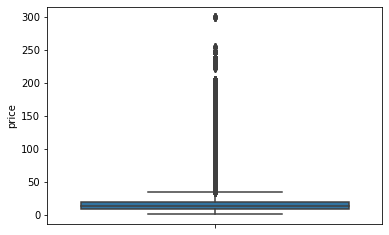

In [38]:
df = df_transactions_all
df

sns.boxplot( y=df_transactions_all["price"] )
plt.show()

Pour la colonne 'price', nous imposerons donc la médiane des prix pour avoir un résultat plus représentatif.

Nous avons éviter de prendre la moyenne du fait des nombreuses valeurs abérrantes.

In [39]:
df_transactions_null['price'].replace([np.nan], df_transactions_all['price'].median(), inplace=True)

In [40]:
df_transactions_null

,id_prod,date,session_id,client_id,price,categ,sex,birth
2633,0_2245,2022-09-23 07:22:38.636773,s_272266,c_4746,13.99,NaN,m,1940
10103,0_2245,2022-07-23 09:24:14.133889,s_242482,c_6713,13.99,NaN,f,1963
11723,0_2245,2022-12-03 03:26:35.696673,s_306338,c_5108,13.99,NaN,m,1978
15670,0_2245,2021-08-16 11:33:25.481411,s_76493,c_1391,13.99,NaN,m,1991
16372,0_2245,2022-07-16 05:53:01.627491,s_239078,c_7954,13.99,NaN,m,1973
...,...,...,...,...,...,...,...,...
669533,0_2245,2021-08-25 09:06:03.504061,s_80395,c_131,13.99,NaN,m,1981
670484,0_2245,2022-03-06 19:59:19.462288,s_175311,c_4167,13.99,NaN,f,1979
671088,0_2245,2022-05-16 11:35:20.319501,s_209381,c_4453,13.99,NaN,m,1981
675480,0_2245,2022-02-11 09:05:43.952857,s_163405,c_1098,13.99,NaN,m,1986


* Calculons alors le chiffre d'affaires de ces articles:

In [41]:
df_transactions_null['price'].sum()

3091.79

*Nous avons donc une somme de 3091.79€ que nous pourrons ajouter au total du chiffre d'affaires.*

* Remplacer les valeurs nulles de la colonne 'categ':

Sur les tables précédentes, nous avons pu constater que sur l'id_prod il y avait une indication sur la catégorie. En effet, celui ci est toujours précédé du numéro de catégorie (0_0000 pour la catégorie 0, 1_0000 pour la categorie 1, etc..).

Ajoutons alors le numéro de catégorie pour ces produits: 

In [42]:
df_transactions_null['categ'].fillna(0, inplace= True)

In [43]:
df_transactions_null

,id_prod,date,session_id,client_id,price,categ,sex,birth
2633,0_2245,2022-09-23 07:22:38.636773,s_272266,c_4746,13.99,0,m,1940
10103,0_2245,2022-07-23 09:24:14.133889,s_242482,c_6713,13.99,0,f,1963
11723,0_2245,2022-12-03 03:26:35.696673,s_306338,c_5108,13.99,0,m,1978
15670,0_2245,2021-08-16 11:33:25.481411,s_76493,c_1391,13.99,0,m,1991
16372,0_2245,2022-07-16 05:53:01.627491,s_239078,c_7954,13.99,0,m,1973
...,...,...,...,...,...,...,...,...
669533,0_2245,2021-08-25 09:06:03.504061,s_80395,c_131,13.99,0,m,1981
670484,0_2245,2022-03-06 19:59:19.462288,s_175311,c_4167,13.99,0,f,1979
671088,0_2245,2022-05-16 11:35:20.319501,s_209381,c_4453,13.99,0,m,1981
675480,0_2245,2022-02-11 09:05:43.952857,s_163405,c_1098,13.99,0,m,1986


* Voyons quel chiffre d'affaires cela représente par année:

In [44]:
df_transactions_null['date'] = df_transactions_null['date'].dt.strftime('%Y-%m')
df_transactions_null

,id_prod,date,session_id,client_id,price,categ,sex,birth
2633,0_2245,2022-09,s_272266,c_4746,13.99,0,m,1940
10103,0_2245,2022-07,s_242482,c_6713,13.99,0,f,1963
11723,0_2245,2022-12,s_306338,c_5108,13.99,0,m,1978
15670,0_2245,2021-08,s_76493,c_1391,13.99,0,m,1991
16372,0_2245,2022-07,s_239078,c_7954,13.99,0,m,1973
...,...,...,...,...,...,...,...,...
669533,0_2245,2021-08,s_80395,c_131,13.99,0,m,1981
670484,0_2245,2022-03,s_175311,c_4167,13.99,0,f,1979
671088,0_2245,2022-05,s_209381,c_4453,13.99,0,m,1981
675480,0_2245,2022-02,s_163405,c_1098,13.99,0,m,1986


In [45]:
df_transactions_null_2021_2022 = df_transactions_null.loc[df_transactions_null['date']<='2022-02']
df_transactions_null_2021_2022

,id_prod,date,session_id,client_id,price,categ,sex,birth
15670,0_2245,2021-08,s_76493,c_1391,13.99,0,m,1991
21337,0_2245,2021-10,s_107564,c_1746,13.99,0,m,1994
21706,0_2245,2021-04,s_21906,c_7808,13.99,0,m,1977
23840,0_2245,2022-02,s_172304,c_4964,13.99,0,f,1982
27430,0_2245,2021-07,s_61081,c_1579,13.99,0,f,1972
...,...,...,...,...,...,...,...,...
666157,0_2245,2021-08,s_71925,c_2039,13.99,0,f,1982
668015,0_2245,2021-03,s_13738,c_7790,13.99,0,f,1983
669533,0_2245,2021-08,s_80395,c_131,13.99,0,m,1981
675480,0_2245,2022-02,s_163405,c_1098,13.99,0,m,1986


In [46]:
CA_val_null_1ere_annee = df_transactions_null_2021_2022['price'].sum()
CA_val_null_1ere_annee

1440.97

In [47]:
df_transactions_null_2022_2023 = df_transactions_null.loc[df_transactions_null['date']>='2022-03']
df_transactions_null_2022_2023

,id_prod,date,session_id,client_id,price,categ,sex,birth
2633,0_2245,2022-09,s_272266,c_4746,13.99,0,m,1940
10103,0_2245,2022-07,s_242482,c_6713,13.99,0,f,1963
11723,0_2245,2022-12,s_306338,c_5108,13.99,0,m,1978
16372,0_2245,2022-07,s_239078,c_7954,13.99,0,m,1973
17392,0_2245,2023-01,s_330241,c_6268,13.99,0,m,1991
...,...,...,...,...,...,...,...,...
661915,0_2245,2022-05,s_202874,c_5056,13.99,0,f,1991
663918,0_2245,2022-10,s_287959,c_7102,13.99,0,m,1983
665139,0_2245,2022-08,s_257900,c_5120,13.99,0,f,1975
670484,0_2245,2022-03,s_175311,c_4167,13.99,0,f,1979


In [48]:
CA_val_null_2eme_annee = df_transactions_null_2022_2023['price'].sum()
CA_val_null_2eme_annee

1650.8200000000002

*Ces résultats seront affichés aux chiffres totaux par an pour comparer les résultats.*

* Nous allons maintenant supprimer ces valeurs nulles pour avoir deux résultats et pour présenter cette différence:

In [49]:
df_transactions_all.dropna(inplace=True)

In [50]:
df_transactions_all.isna().sum()

id_prod       0
date          0
session_id    0
client_id     0
price         0
categ         0
sex           0
birth         0
dtype: int64

* Voyons si les types des colonnes sont toujours cohérents:

In [51]:
df_transactions_all.dtypes

id_prod               object
date          datetime64[ns]
session_id            object
client_id             object
price                float64
categ                 object
sex                   object
birth                 object
dtype: object

* Caclul du chiffre d'affaires par mois:

In [52]:
mois_ = df_transactions_all.copy()
mois = mois_.date.dt.to_period("M")
df_transactions_ca_mois = mois_.groupby(mois).sum()
df_transactions_ca_mois = df_transactions_ca_mois.reset_index()
df_transactions_ca_mois

,date,price
0,2021-03,482440.61
1,2021-04,476109.30
2,2021-05,492943.47
3,2021-06,484088.56
4,2021-07,482835.40
5,2021-08,482284.79
6,2021-09,507240.68
7,2021-10,320798.74
8,2021-11,516167.73
9,2021-12,525917.28


In [53]:
df_transactions_ca_mois['price'].sum()

11853728.68

Nous avons un chiffre d'affaires qui s'élève à 11 853 728.68€ sur deux ans. Nous pourrons ajouter la différence des valeurs manquantes que nous avons remplacé. Soit un total possible de 11 856 819.8€

* Caclul du chiffre d'affaires pour la première année:

In [54]:
df_transactions_ca_1ere_année = df_transactions_ca_mois.copy()
df_transactions_ca_1ere_année = df_transactions_ca_1ere_année.loc[df_transactions_ca_mois['date']<='2022-02']
df_transactions_ca_1ere_année

,date,price
0,2021-03,482440.61
1,2021-04,476109.30
2,2021-05,492943.47
3,2021-06,484088.56
4,2021-07,482835.40
5,2021-08,482284.79
6,2021-09,507240.68
7,2021-10,320798.74
8,2021-11,516167.73
9,2021-12,525917.28


In [55]:
df_transactions_ca_1ere_année['price'].sum()

5831737.05

Soit un total de 5831737.05€ ou avec les valeurs manquantes remplacées:

In [56]:
CA_val_null_1ere_annee + df_transactions_ca_1ere_année['price'].sum()

5833178.02

In [57]:
df_transactions_ca_1ere_année['month'] = df_transactions_ca_1ere_année['date'].dt.month
df_transactions_ca_1ere_année

,date,price,month
0,2021-03,482440.61,3
1,2021-04,476109.30,4
2,2021-05,492943.47,5
3,2021-06,484088.56,6
4,2021-07,482835.40,7
5,2021-08,482284.79,8
6,2021-09,507240.68,9
7,2021-10,320798.74,10
8,2021-11,516167.73,11
9,2021-12,525917.28,12


* Caclul du chiffre d'affaires pour la deuxième année:

In [58]:
df_transactions_ca_2eme_année = df_transactions_ca_mois.loc[df_transactions_ca_mois['date']>='2022-03']
df_transactions_ca_2eme_année = df_transactions_ca_2eme_année.reset_index()
df_transactions_ca_2eme_année = df_transactions_ca_2eme_année.drop(columns=['index'])
df_transactions_ca_2eme_année

,date,price
0,2022-03,515456.53
1,2022-04,492998.94
2,2022-05,517132.60
3,2022-06,496016.12
4,2022-07,510783.12
5,2022-08,506467.27
6,2022-09,494114.53
7,2022-10,507917.77
8,2022-11,496664.94
9,2022-12,510219.50


In [59]:
df_transactions_ca_2eme_année['month'] = df_transactions_ca_2eme_année['date'].dt.month
df_transactions_ca_2eme_année

,date,price,month
0,2022-03,515456.53,3
1,2022-04,492998.94,4
2,2022-05,517132.60,5
3,2022-06,496016.12,6
4,2022-07,510783.12,7
5,2022-08,506467.27,8
6,2022-09,494114.53,9
7,2022-10,507917.77,10
8,2022-11,496664.94,11
9,2022-12,510219.50,12


In [60]:
df_transactions_ca_2eme_année['price'].sum()

6021991.63

Soit un total de 6021991.63€ ou avec les valeurs manquantes remplacées:

In [61]:
CA_val_null_2eme_annee + df_transactions_ca_2eme_année['price'].sum()

6023642.45

* Représentation de la différence entre les deux années:

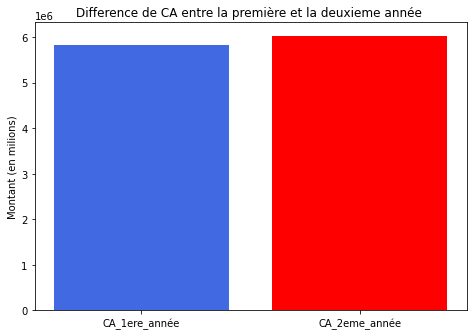

In [62]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
catégorie = ['CA_1ere_année', 'CA_2eme_année']
nb_population = [df_transactions_ca_1ere_année['price'].sum(), df_transactions_ca_2eme_année['price'].sum()]
ax.bar(catégorie,nb_population)
ax.set_ylabel('Montant (en milions)')
ax.set_title('Difference de CA entre la première et la deuxieme année ')
plt.bar(catégorie,nb_population, color=['royalblue','red'])
plt.show()

* Evolution du chifre d'affaires depuis l'ouverture:

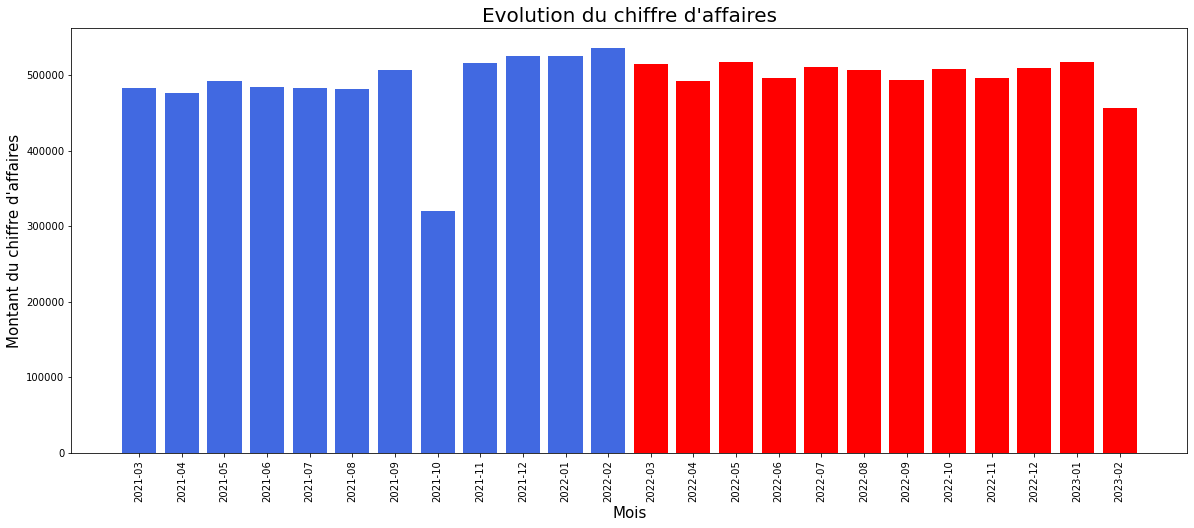

In [63]:
plt.subplots(figsize = (20,10))

t1 = df_transactions_ca_mois.loc[df_transactions_ca_mois['date']<='2022-02']
t2 = df_transactions_ca_mois.loc[df_transactions_ca_mois['date']>='2022-03']

plt.bar(t1.index.values, t1['price'], color='royalblue')
plt.bar(t2.index.values, t2['price'], color='red')
bars = df_transactions_ca_mois['date']

bars = df_transactions_ca_mois['date']
x_pos = np.arange(len(bars))
plt.xticks(x_pos, bars, rotation=90)

plt.subplots_adjust(bottom=0.4, top=0.99)   
plt.xlabel('Mois',fontsize = 15)
plt.ylabel("Montant du chiffre d'affaires",fontsize = 15) 
plt.title("Evolution du chiffre d'affaires",fontsize = 20 )

plt.show()

* Evolution du chiffre d'affaire par année:

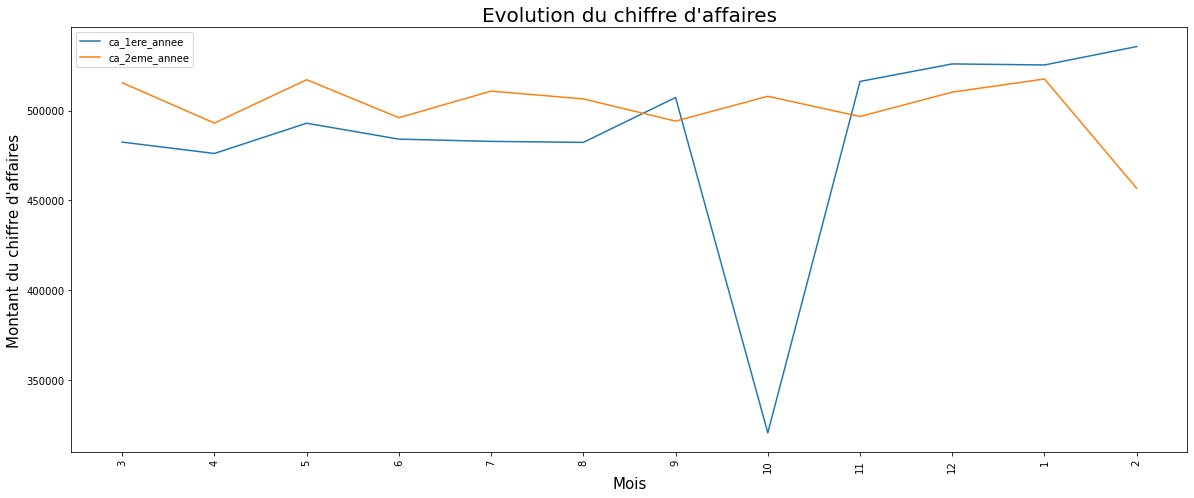

In [64]:
plt.subplots(figsize = (20,10))
ca_1ere_annee = df_transactions_ca_1ere_année['price']
ca_2eme_annee = df_transactions_ca_2eme_année['price']
bars = df_transactions_ca_1ere_année['month']
x_pos = np.arange(len(bars))
plt.plot(x_pos, ca_1ere_annee, label= 'ca_1ere_annee' )
plt.plot(x_pos, ca_2eme_annee, label= 'ca_2eme_annee')
plt.legend()
plt.xticks(x_pos, bars, rotation=90)
plt.subplots_adjust(bottom=0.4, top=0.99)   
plt.xlabel('Mois',fontsize = 15)
plt.ylabel("Montant du chiffre d'affaires",fontsize = 15) 
plt.title("Evolution du chiffre d'affaires",fontsize = 20 )
plt.show()

Nous avons une chute du chiffre d'affaires au mois d'octobre sur la première année.

* Observons si le chiffre d'affaires par catégorie coincide avec cette chute du mois d'Octobre:

In [65]:
df_transactions_evol_categ = df_transactions_all.copy()
df_transactions_evol_categ['date'] = df_transactions_evol_categ['date'].dt.strftime('%Y-%m')

In [66]:
df_transactions_evol_categ

,id_prod,date,session_id,client_id,price,categ,sex,birth
0,0_1518,2022-05,s_211425,c_103,4.18,0,f,1986
1,1_251,2022-02,s_158752,c_8534,15.99,1,m,1988
2,0_1277,2022-06,s_225667,c_6714,7.99,0,f,1968
3,2_209,2021-06,s_52962,c_6941,69.99,2,m,2000
4,0_1509,2023-01,s_325227,c_4232,4.99,0,m,1980
...,...,...,...,...,...,...,...,...
679327,0_1551,2022-01,s_150195,c_8489,12.99,0,f,1951
679328,1_639,2022-03,s_181434,c_4370,10.99,1,f,1977
679329,0_1425,2022-12,s_314704,c_304,12.99,0,f,1988
679330,0_1994,2021-07,s_63204,c_2227,4.98,0,m,1986


In [67]:
df_transactions_evol_categ['date'] = pd.to_datetime(df_transactions_evol_categ['date'])

* Selection des tables par catégorie:

In [68]:
df_transactions_evol_categ_0 = df_transactions_evol_categ.loc[df_transactions_evol_categ['categ']==0]
df_transactions_evol_categ_1 = df_transactions_evol_categ.loc[df_transactions_evol_categ['categ']==1]
df_transactions_evol_categ_2 = df_transactions_evol_categ.loc[df_transactions_evol_categ['categ']==2]

* Classement par mois pour la première année:

In [69]:
mois_ = df_transactions_evol_categ_0.copy()
mois = mois_.date.dt.to_period("M")
df_transactions_evol_categ_0 = mois_.groupby(mois).sum()
df_transactions_evol_categ_0 = df_transactions_evol_categ_0.reset_index()
df_transactions_evol_cat_0 = df_transactions_evol_categ_0.copy()
df_transactions_evol_cat_0 = df_transactions_evol_cat_0.loc[df_transactions_evol_cat_0['date']<='2022-02']

In [70]:
mois_ = df_transactions_evol_categ_1.copy()
mois = mois_.date.dt.to_period("M")
df_transactions_evol_categ_1 = mois_.groupby(mois).sum()
df_transactions_evol_categ_1 = df_transactions_evol_categ_1.reset_index()
df_transactions_evol_cat_1 = df_transactions_evol_categ_1.copy()
df_transactions_evol_cat_1 = df_transactions_evol_cat_1.loc[df_transactions_evol_cat_1['date']<='2022-02']

In [71]:
mois_ = df_transactions_evol_categ_2.copy()
mois = mois_.date.dt.to_period("M")
df_transactions_evol_categ_2 = mois_.groupby(mois).sum()
df_transactions_evol_categ_2 = df_transactions_evol_categ_2.reset_index()
df_transactions_evol_cat_2 = df_transactions_evol_categ_2.copy()
df_transactions_evol_cat_2 = df_transactions_evol_cat_2.loc[df_transactions_evol_cat_2['date']<='2022-02']

* Représentation du chiffres d'affaires des trois catégories sur la première année:

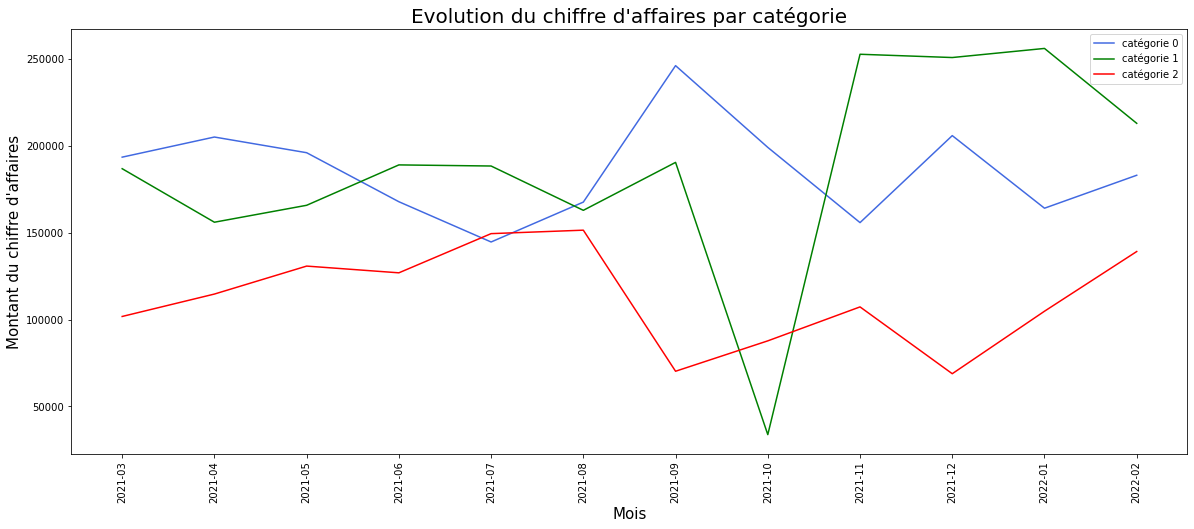

In [72]:
plt.subplots(figsize = (20,10))
ca_categ_0 = df_transactions_evol_cat_0['price']
ca_categ_1 = df_transactions_evol_cat_1['price']
ca_categ_2 = df_transactions_evol_cat_2['price']

bars = df_transactions_evol_cat_0['date']
x_pos = np.arange(len(bars))
plt.plot(x_pos, ca_categ_0, label= 'catégorie 0',color='royalblue')
plt.plot(x_pos, ca_categ_1, label= 'catégorie 1',color='g')
plt.plot(x_pos, ca_categ_2, label= 'catégorie 2',color='r')
plt.legend()
plt.xticks(x_pos, bars, rotation=90)
plt.subplots_adjust(bottom=0.4, top=0.99)   
plt.xlabel('Mois',fontsize = 15)
plt.ylabel("Montant du chiffre d'affaires",fontsize = 15) 
plt.title("Evolution du chiffre d'affaires par catégorie",fontsize = 20 )
plt.show()

On peut constater une chute du chiffre d'affaires pour la catégorie 1. Cette chute peut etre la cause de la baisse du chiffre d'affaires total.

* Observons pourquoi cette catégorie à eu une chute de chiffre d'affaires à ce moment:

In [73]:
df_transactions_evol_categ_2021 = df_transactions_all.copy()
df_transactions_evol_categ_2021['date'] = df_transactions_evol_categ_2021['date'].dt.strftime('%Y-%m-%d')

In [74]:
df_transactions_evol_categ1_2021 = df_transactions_evol_categ_2021.loc[df_transactions_evol_categ_2021['categ']==1]
df_transactions_evol_categ1_2021

,id_prod,date,session_id,client_id,price,categ,sex,birth
1,1_251,2022-02-02,s_158752,c_8534,15.99,1,m,1988
9,1_299,2021-11-29,s_126880,c_1847,13.99,1,m,1973
11,1_281,2021-06-06,s_45036,c_1522,23.99,1,m,1960
12,1_466,2023-02-12,s_340314,c_683,15.81,1,f,1958
17,1_661,2022-09-13,s_267366,c_6714,22.99,1,f,1968
...,...,...,...,...,...,...,...,...
679322,1_328,2023-01-22,s_330818,c_5173,29.24,1,f,2002
679323,1_190,2022-01-30,s_157285,c_656,14.53,1,f,1983
679326,1_425,2022-03-18,s_181088,c_5533,16.99,1,f,1965
679328,1_639,2022-03-19,s_181434,c_4370,10.99,1,f,1977


In [75]:
df_transactions_evol_categ1_2021_10 =  df_transactions_evol_categ1_2021.loc[(df_transactions_evol_categ1_2021['date']>='2021-10-01') & (df_transactions_evol_categ1_2021['date']<='2021-10-31')]
df_transactions_evol_categ1_2021_10

,id_prod,date,session_id,client_id,price,categ,sex,birth
1369,1_379,2021-10-30,s_112459,c_7621,26.99,1,m,1957
1512,1_247,2021-10-30,s_112040,c_1582,20.99,1,f,1947
1930,1_367,2021-10-31,s_112786,c_1609,13.99,1,m,1980
2340,1_247,2021-10-29,s_111607,c_7029,20.99,1,m,1996
2386,1_426,2021-10-31,s_112534,c_6668,19.44,1,f,2004
...,...,...,...,...,...,...,...,...
677934,1_687,2021-10-30,s_112116,c_596,7.99,1,m,2002
677988,1_475,2021-10-31,s_112853,c_7558,20.99,1,f,1944
678085,1_370,2021-10-30,s_112132,c_8609,13.11,1,f,1970
678534,1_459,2021-10-31,s_112522,c_7946,15.99,1,f,1987


In [76]:
df_transactions_evol_categ1_2021_10 = df_transactions_evol_categ1_2021_10.groupby(['date']).sum()
df_transactions_evol_categ1_2021_10['price'].sum()

33762.32

On peut voir qu'il n'y a eu aucune vente entre le 01 et le 28 de ce mois. Il y a peut etre eu un manque de stock sur les articles de cette catégorie ou alors un problème d'accès pour acheter ces articles.

* Comparons au mois suivant :

In [77]:
df_transactions_evol_categ1_2021_11 =  df_transactions_evol_categ1_2021.loc[(df_transactions_evol_categ1_2021['date']>='2021-11-01') & (df_transactions_evol_categ1_2021['date']<='2021-11-30')]
df_transactions_evol_categ1_2021_11

,id_prod,date,session_id,client_id,price,categ,sex,birth
9,1_299,2021-11-29,s_126880,c_1847,13.99,1,m,1973
73,1_630,2021-11-13,s_118832,c_1490,10.75,1,m,1969
177,1_536,2021-11-06,s_115771,c_4958,11.21,1,m,1999
228,1_381,2021-11-27,s_125605,c_6536,15.99,1,m,1987
319,1_735,2021-11-04,s_114443,c_628,22.99,1,m,1991
...,...,...,...,...,...,...,...,...
679145,1_480,2021-11-13,s_119183,c_3237,19.08,1,f,1967
679186,1_283,2021-11-15,s_119822,c_2155,14.99,1,f,1958
679190,1_264,2021-11-15,s_119802,c_178,16.07,1,f,1950
679273,1_388,2021-11-25,s_124771,c_56,16.70,1,f,1981


In [78]:
df_transactions_evol_categ1_2021_11 = df_transactions_evol_categ1_2021_11.groupby(['date']).sum()
df_transactions_evol_categ1_2021_11

,price
date,
2021-11-01,7248.75
2021-11-02,8165.79
2021-11-03,7645.40
2021-11-04,6922.43
2021-11-05,7639.14
2021-11-06,7283.12
2021-11-07,7643.35
2021-11-08,8580.57
2021-11-09,7276.37


On peut voir qu'il y a beaucoup plus de ventes sur ce mois et qu'il n'y a pas de jour manquant. Il faudra donc voir pourquoi il n'y a pas eu de ventes dans cette catégorie 1 entre le 01 et le 28 octobre 2021.

Il est possible de remplacer les valeurs manquantes par la moyenne journalière, en effet il n'y a pas de valeurs abérrantes sur les montants journaliers. Dans le cas contraire nous aurions pris la mediane. 

Si cette perte s'explique par un manque de stock alors les résultats sont logiques, mais si le problème vient d'une perte de données alors essayons de remplacer cela.


* Calcul de la moyenne du chiffre d'affaires journalier pour octobre 2021:

In [79]:
moyenne_ocobre_2021 = df_transactions_evol_categ1_2021_10['price'].mean()
moyenne_ocobre_2021

6752.464

* Modification de la table catégorie 1 pour la première année: 

In [80]:
df_transactions_evol_cat_1_corrigé = df_transactions_evol_cat_1.copy()

Nous avons 26 jours manquants, donc nous ajouterons 26 fois la moyenne journalière au chiffre d'affaires d'Octobre.

In [81]:
df_transactions_evol_cat_1_corrigé.loc[df_transactions_evol_cat_1_corrigé['date'] =='2021-10' ,'price'] = 33762.32 + (26*6752.464)
df_transactions_evol_cat_1_corrigé

,date,price
0,2021-03,186974.170
1,2021-04,156138.350
2,2021-05,165893.400
3,2021-06,189162.040
4,2021-07,188523.270
5,2021-08,162991.380
6,2021-09,190613.780
7,2021-10,209326.384
8,2021-11,252910.390
9,2021-12,251026.750


* Visualisation de l'évolution avec la correction pour la catégorie 1:

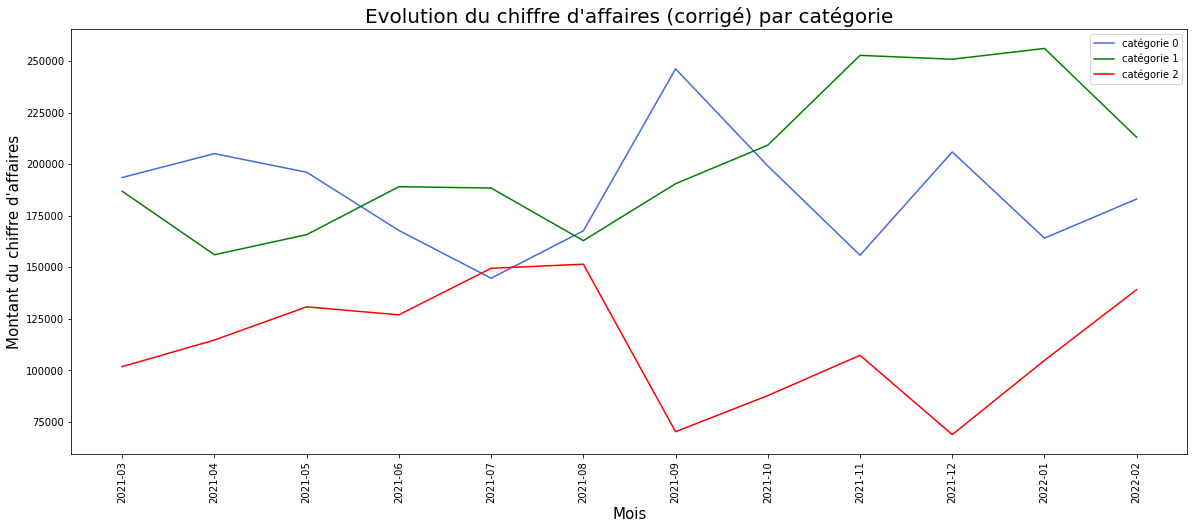

In [82]:
plt.subplots(figsize = (20,10))
ca_categ_0 = df_transactions_evol_cat_0['price']
ca_categ_1 = df_transactions_evol_cat_1_corrigé['price']
ca_categ_2 = df_transactions_evol_cat_2['price']

bars = df_transactions_evol_cat_0['date']
x_pos = np.arange(len(bars))
plt.plot(x_pos, ca_categ_0, label= 'catégorie 0',color='royalblue')
plt.plot(x_pos, ca_categ_1, label= 'catégorie 1',color='g')
plt.plot(x_pos, ca_categ_2, label= 'catégorie 2',color='r')
plt.legend()
plt.xticks(x_pos, bars, rotation=90)
plt.subplots_adjust(bottom=0.4, top=0.99)   
plt.xlabel('Mois',fontsize = 15)
plt.ylabel("Montant du chiffre d'affaires",fontsize = 15) 
plt.title("Evolution du chiffre d'affaires (corrigé) par catégorie",fontsize = 20 )
plt.show()

* Observons si cette correction a eu un impact sur le chiffre d'affaires total de la première année:

In [83]:
df_transactions_evol_1ere_annee_corrigé = df_transactions_evol_cat_1_corrigé.copy

In [84]:
df_transactions_evol_1ere_annee_corrigé = pd.merge(df_transactions_evol_cat_0, df_transactions_evol_cat_1_corrigé, how='left', on='date')
df_transactions_evol_1ere_annee_corrigé = pd.merge(df_transactions_evol_1ere_annee_corrigé, df_transactions_evol_cat_2, how='left', on='date')

In [85]:
df_transactions_evol_1ere_annee_corrigé['price1'] = df_transactions_evol_1ere_annee_corrigé['price_x']+df_transactions_evol_1ere_annee_corrigé['price_y']+df_transactions_evol_1ere_annee_corrigé['price']
df_transactions_evol_1ere_annee_corrigé = df_transactions_evol_1ere_annee_corrigé.drop(columns=['price_x','price_y','price'])
df_transactions_evol_1ere_annee_corrigé = df_transactions_evol_1ere_annee_corrigé.rename(columns={'price1':'price'})
df_transactions_evol_1ere_annee_corrigé

,date,price
0,2021-03,482440.610
1,2021-04,476109.300
2,2021-05,492943.470
3,2021-06,484088.560
4,2021-07,482835.400
5,2021-08,482284.790
6,2021-09,507240.680
7,2021-10,496362.804
8,2021-11,516167.730
9,2021-12,525917.280


* Représentation graphique de l'évolution avec les données de la première année corrigées:

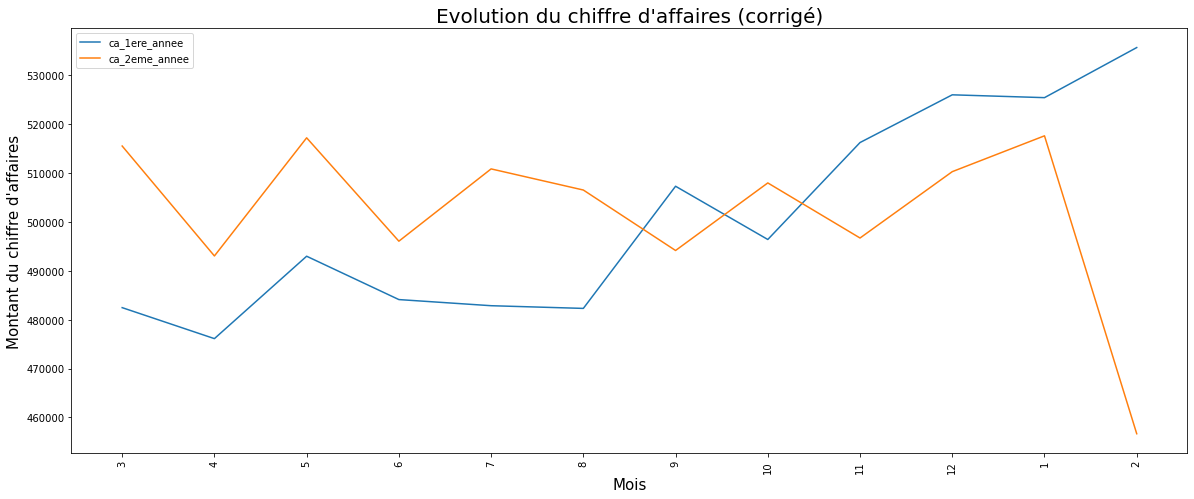

In [86]:
plt.subplots(figsize = (20,10))
ca_1ere_annee = df_transactions_evol_1ere_annee_corrigé['price']
ca_2eme_annee = df_transactions_ca_2eme_année['price']
bars = df_transactions_ca_1ere_année['month']
x_pos = np.arange(len(bars))
plt.plot(x_pos, ca_1ere_annee, label= 'ca_1ere_annee' )
plt.plot(x_pos, ca_2eme_annee, label= 'ca_2eme_annee')
plt.legend()
plt.xticks(x_pos, bars, rotation=90)
plt.subplots_adjust(bottom=0.4, top=0.99)   
plt.xlabel('Mois',fontsize = 15)
plt.ylabel("Montant du chiffre d'affaires",fontsize = 15) 
plt.title("Evolution du chiffre d'affaires (corrigé)",fontsize = 20 )
plt.show()

Nous avons donc efectivement la source de la baisse du chiffre d'affaires sur le mois d'Octobre. Le manque de données pour la catégorie 1 à ce moment à été la cause de cette baisse.

* Voyons pourquoi nous avons une chute du chiffre d'affaires sur le mois de fevrier 2023:

In [87]:
df_transactions_ca_fevrier2023 = df_transactions_evol_categ_2021.loc[df_transactions_evol_categ_2021['date']>='2023-02']
df_transactions_ca_fevrier2023

,id_prod,date,session_id,client_id,price,categ,sex,birth
12,1_466,2023-02-12,s_340314,c_683,15.81,1,f,1958
21,0_1100,2023-02-04,s_336957,c_3371,3.03,0,f,1945
44,0_1070,2023-02-26,s_347326,c_252,4.38,0,f,1973
46,1_451,2023-02-01,s_335638,c_2589,20.99,1,f,2004
69,0_1799,2023-02-24,s_346260,c_2963,9.99,0,f,1957
...,...,...,...,...,...,...,...,...
679218,0_1501,2023-02-13,s_340810,c_7088,11.99,0,m,1987
679250,0_2028,2023-02-19,s_343763,c_3005,13.37,0,f,1972
679252,0_1007,2023-02-12,s_340373,c_3091,4.99,0,m,1977
679258,0_239,2023-02-23,s_345908,c_7212,8.99,0,f,1975


In [88]:
total_ca_fevrier2023 = df_transactions_ca_fevrier2023['price'].sum()
total_ca_fevrier2023

456679.76000000007

Nous voyons bien sur le graphique que nous avons une perte de plus de 50000€. Le mois de Fevrier comporte 28 jours donc 3 jours de moins que Janvier. Si l'on avait autant de jours, nous n'aurions pas eu cette différence de chiffre d'affaires.

In [89]:
df_transactions_ca_fevrier2023_group = df_transactions_ca_fevrier2023.groupby(['date']).sum()
df_transactions_ca_fevrier2023_group

,price
date,
2023-02-01,16718.43
2023-02-02,17423.19
2023-02-03,15669.55
2023-02-04,14586.31
2023-02-05,16111.41
2023-02-06,14235.62
2023-02-07,18217.02
2023-02-08,15397.83
2023-02-09,16065.94


In [90]:
moyenne_jour_ca_fevrier2023 = df_transactions_ca_fevrier2023_group['price'].mean()
moyenne_jour_ca_fevrier2023

16309.991428571424

In [91]:
moyenne_jour_ca_fevrier2023*3

48929.97428571427

Nous avons bien une perte qui se rapproche des 50000€ donc cette chute de chiffre d'affaires pour le mois de Fevrier ne pouvait etre évité.

### Évolution dans le temps et mise en place d'une décomposition en moyenne mobile pour évaluer la tendance globale:

* Calcul de la moyenne mobile:

In [92]:
df_transactions_ca_mois['moyenne_mobile'] = df_transactions_ca_mois['price'].rolling(window =4).mean()
df_transactions_ca_mois

,date,price,moyenne_mobile
0,2021-03,482440.61,NaN
1,2021-04,476109.30,NaN
2,2021-05,492943.47,NaN
3,2021-06,484088.56,483895.4850
4,2021-07,482835.40,483994.1825
5,2021-08,482284.79,485538.0550
6,2021-09,507240.68,489112.3575
7,2021-10,320798.74,448289.9025
8,2021-11,516167.73,456622.9850
9,2021-12,525917.28,467531.1075


*La moyenne mobile permettra d'éliminer les fluctuations les moins significatives.*

* Evaluer la tendance globale à l'aide de la moyenne mobile:

In [93]:
from scipy.stats import linregress
p_price, i_price, *others = linregress(x=df_transactions_ca_mois.index, y=df_transactions_ca_mois.price)
df_transactions_ca_mois['trend_price'] = p_price * df_transactions_ca_mois.index + i_price
df_transactions_ca_mois

,date,price,moyenne_mobile,trend_price
0,2021-03,482440.61,NaN,480161.091567
1,2021-04,476109.30,NaN,481356.245488
2,2021-05,492943.47,NaN,482551.399410
3,2021-06,484088.56,483895.4850,483746.553332
4,2021-07,482835.40,483994.1825,484941.707254
5,2021-08,482284.79,485538.0550,486136.861175
6,2021-09,507240.68,489112.3575,487332.015097
7,2021-10,320798.74,448289.9025,488527.169019
8,2021-11,516167.73,456622.9850,489722.322941
9,2021-12,525917.28,467531.1075,490917.476862


* Visualisation de l'évolution du chiffre d'affaires mensuel depuis l'ouverture:

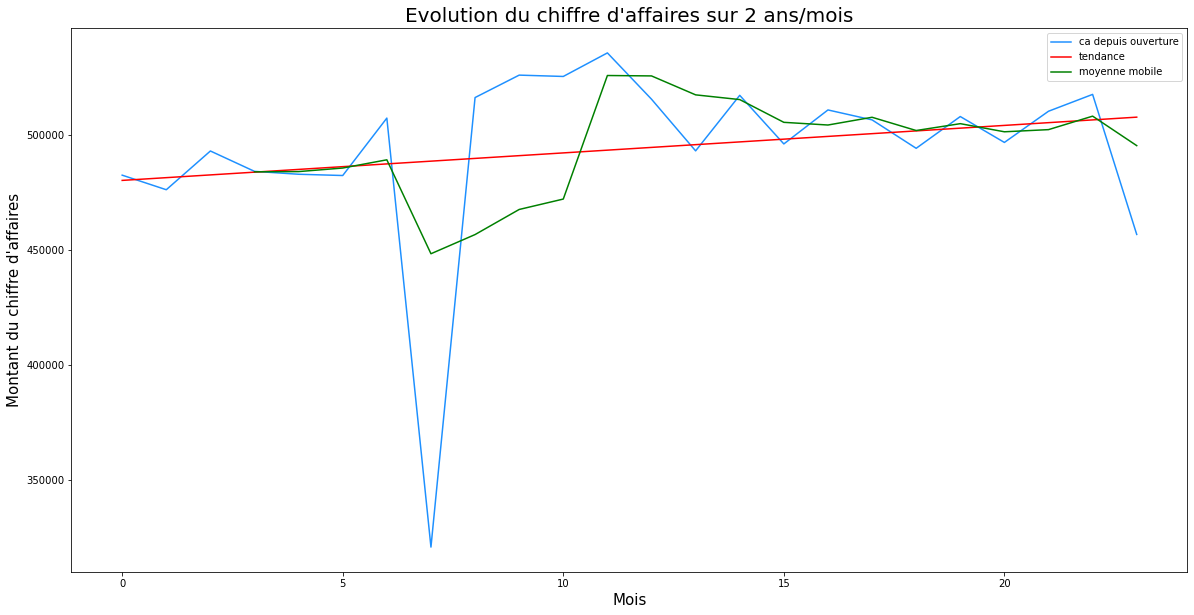

In [94]:
plt.subplots(figsize = (30,15))
df_transactions_ca_mois['price'].plot(figsize=(20,10),label= 'ca depuis ouverture', color='dodgerblue')
df_transactions_ca_mois['trend_price'].plot(figsize=(20,10),label= 'tendance', color='r')
df_transactions_ca_mois['price'].rolling(window =4).mean().plot(label= 'moyenne mobile', color='g')
plt.legend()
plt.xlabel('Mois',fontsize = 15)
plt.ylabel("Montant du chiffre d'affaires",fontsize = 15) 
plt.title("Evolution du chiffre d'affaires sur 2 ans/mois",fontsize = 20 )
plt.show()

* Voyons ensuite ce que cela donne par jour:

In [95]:
df_test=df_transactions_all.copy()

In [96]:
df_test=df_test.groupby(by=df_test['date'].dt.date).sum()
df_test

,price
date,
2021-03-01,16565.22
2021-03-02,15486.45
2021-03-03,15198.69
2021-03-04,15196.07
2021-03-05,17471.37
...,...
2023-02-24,15207.89
2023-02-25,15761.25
2023-02-26,16304.72


In [97]:
df_test = df_test.reset_index()

In [98]:
df_test1=df_test.copy()

In [99]:
from scipy.stats import linregress
p_price, i_price, *others = linregress(x=df_test1.index, y=df_test1.price)
df_test1['trend_price'] = p_price * df_test1.index + i_price
df_test1

,date,price,trend_price
0,2021-03-01,16565.22,15620.317804
1,2021-03-02,15486.45,15622.012363
2,2021-03-03,15198.69,15623.706922
3,2021-03-04,15196.07,15625.401481
4,2021-03-05,17471.37,15627.096040
...,...,...,...
725,2023-02-24,15207.89,16848.872947
726,2023-02-25,15761.25,16850.567506
727,2023-02-26,16304.72,16852.262064
728,2023-02-27,19170.81,16853.956623


* Visualisation de l'évolution du chiffre d'affaires journalier depuis l'ouverture:

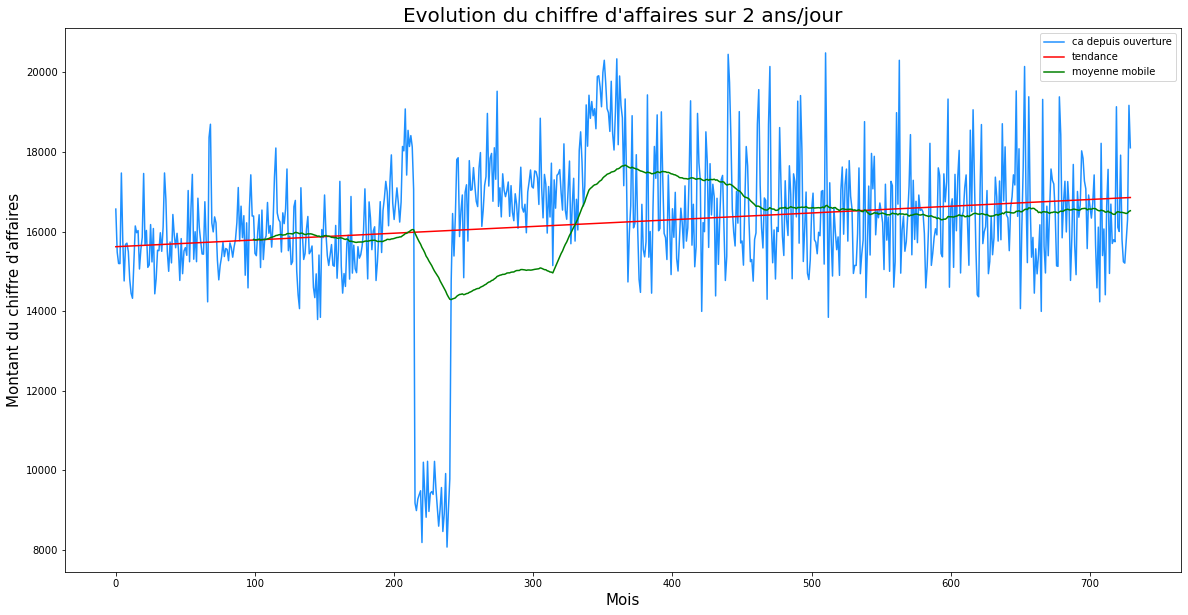

In [100]:
plt.subplots(figsize = (30,15))
df_test1['price'].plot(figsize=(20,10),label= 'ca depuis ouverture', color='dodgerblue')
df_test1['trend_price'].plot(figsize=(20,10),label= 'tendance', color='r')
df_test1['price'].rolling(window =100).mean().plot(label= 'moyenne mobile', color='g')
plt.legend()
plt.xlabel('Mois',fontsize = 15)
plt.ylabel("Montant du chiffre d'affaires",fontsize = 15) 
plt.title("Evolution du chiffre d'affaires sur 2 ans/jour",fontsize = 20 )
plt.show()

*Nous voyons bien à l'aide de la tendance que nous avons une croissance du chiffre d'affaires sur les deux ans.*

### Zoom sur les références, les tops et les flops, la répartition par catégorie:

* Observons le nombre de ventes par produits:

In [101]:
nb_ventes_produit = df_transactions_all['id_prod'].value_counts()
nb_ventes_produit

1_369     2252
1_417     2189
1_414     2180
1_498     2128
1_425     2096
          ... 
2_23         1
0_1284       1
2_98         1
2_81         1
0_833        1
Name: id_prod, Length: 3265, dtype: int64

In [102]:
nb_ref = df_transactions_all['id_prod'].unique()
nb_ref

array(['0_1518', '1_251', '0_1277', ..., '0_1379', '0_886', '0_833'],
      dtype=object)

In [103]:
len(nb_ventes_produit)

3265

Nous avons 3266 produits en ventes, voyons quelles sont les produits les plus vendues et les plus rentables:

* Création de table avec les articles les plus vendues:

In [104]:
data={'Nombre total':nb_ventes_produit}
df_transactions_nb_total = pd.DataFrame(data=data, index=nb_ref)
df_transactions_nb_total

,Nombre total
0_1518,674
1_251,863
0_1277,417
2_209,814
0_1509,627
...,...
0_1279,2
0_1683,1
0_1379,1
0_886,1


In [105]:
df_transactions_nb_total = df_transactions_nb_total.reset_index()
df_transactions_nb_total

,index,Nombre total
0,0_1518,674
1,1_251,863
2,0_1277,417
3,2_209,814
4,0_1509,627
...,...,...
3260,0_1279,2
3261,0_1683,1
3262,0_1379,1
3263,0_886,1


In [106]:
df_transactions_nb_total.rename(columns={'index': 'id_prod'}, inplace=True)
df_transactions_nb_total

,id_prod,Nombre total
0,0_1518,674
1,1_251,863
2,0_1277,417
3,2_209,814
4,0_1509,627
...,...,...
3260,0_1279,2
3261,0_1683,1
3262,0_1379,1
3263,0_886,1


* Création de table avec le total du chiffre d'affaires par article:

In [107]:
df_transactions_id = df_transactions_all.groupby(['id_prod']).sum()
df_transactions_id

,price
id_prod,
0_0,4657.50
0_1,5352.13
0_10,394.90
0_100,61.80
0_1000,2954.88
...,...
2_95,395.96
2_96,28650.18
2_97,2092.87


In [108]:
df_transactions_id = df_transactions_id.reset_index()
df_transactions_id

,id_prod,price
0,0_0,4657.50
1,0_1,5352.13
2,0_10,394.90
3,0_100,61.80
4,0_1000,2954.88
...,...,...
3260,2_95,395.96
3261,2_96,28650.18
3262,2_97,2092.87
3263,2_98,149.74


* Jointure entre les deux tables pour avoir une vue sur toutes les données:

In [109]:
df_transactions_id_prod = pd.merge(df_transactions_nb_total, df_transactions_id, how='left', on='id_prod' )
df_transactions_id_prod

,id_prod,Nombre total,price
0,0_1518,674,2817.32
1,1_251,863,13799.37
2,0_1277,417,3331.83
3,2_209,814,56971.86
4,0_1509,627,3128.73
...,...,...,...
3260,0_1279,2,41.98
3261,0_1683,1,2.99
3262,0_1379,1,2.99
3263,0_886,1,21.82


In [110]:
df_transactions_id_prod.rename(columns={'price': 'CA par produit'}, inplace=True)
df_transactions_id_prod

,id_prod,Nombre total,CA par produit
0,0_1518,674,2817.32
1,1_251,863,13799.37
2,0_1277,417,3331.83
3,2_209,814,56971.86
4,0_1509,627,3128.73
...,...,...,...
3260,0_1279,2,41.98
3261,0_1683,1,2.99
3262,0_1379,1,2.99
3263,0_886,1,21.82


* Classement sur les 20 produits les plus vendus:

In [111]:
df_transactions_al_top20_ventes = df_transactions_id_prod.sort_values(by='Nombre total', ascending=False).head(20)
df_transactions_al_top20_ventes

,id_prod,Nombre total,CA par produit
75,1_369,2252,54025.48
482,1_417,2189,45947.11
79,1_414,2180,51949.40
453,1_498,2128,49731.36
272,1_425,2096,35611.04
320,1_403,1960,35260.40
273,1_412,1951,32484.15
677,1_413,1945,34990.55
52,1_406,1939,48106.59
120,1_407,1935,30940.65


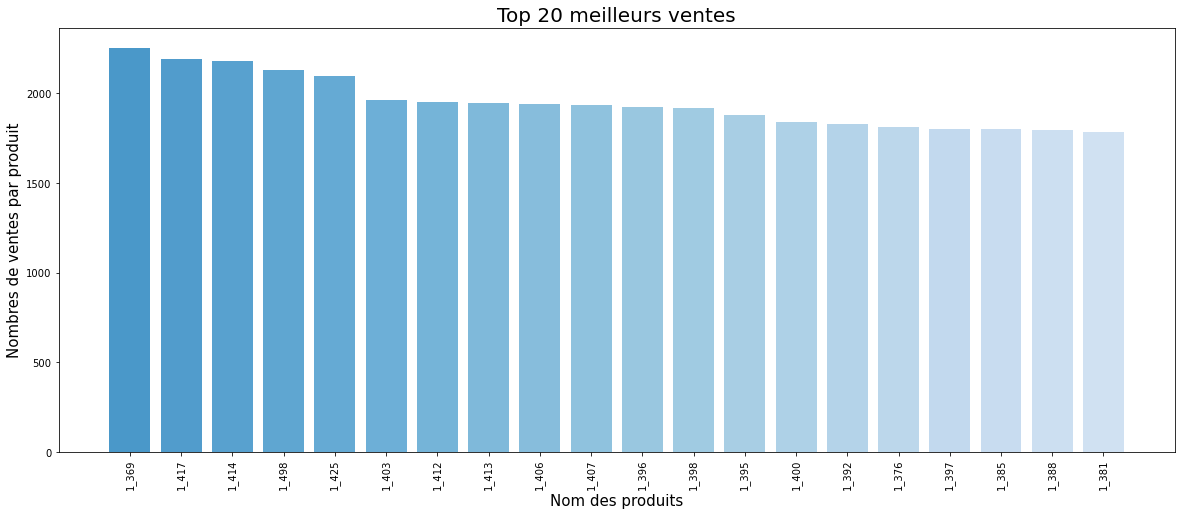

In [112]:
from matplotlib import cm
plt.subplots(figsize = (20,10))
height = df_transactions_al_top20_ventes['Nombre total']
bars =df_transactions_al_top20_ventes['id_prod']
x_pos = np.arange(len(bars))
color = cm.Blues_r(np.linspace(.4,.8, 20))
plt.bar(x_pos, height, color=color)
plt.xticks(x_pos, bars, rotation=90)
plt.subplots_adjust(bottom=0.4, top=0.99)   
plt.xlabel('Nom des produits',fontsize = 15)
plt.ylabel("Nombres de ventes par produit",fontsize = 15) 
plt.title('Top 20 meilleurs ventes',fontsize = 20 )
plt.show()

* Classement sur les 20 produits les plus rentables:

In [113]:
df_transactions_al_top20_ca = df_transactions_id_prod.sort_values(by='CA par produit', ascending=False).head(20)
df_transactions_al_top20_ca

,id_prod,Nombre total,CA par produit
231,2_159,650,94893.50
127,2_135,1005,69334.95
33,2_112,968,65407.76
421,2_102,1027,60736.78
3,2_209,814,56971.86
205,1_395,1875,54356.25
75,1_369,2252,54025.48
660,2_110,865,53846.25
765,2_39,915,53060.85
1053,2_166,228,52449.12


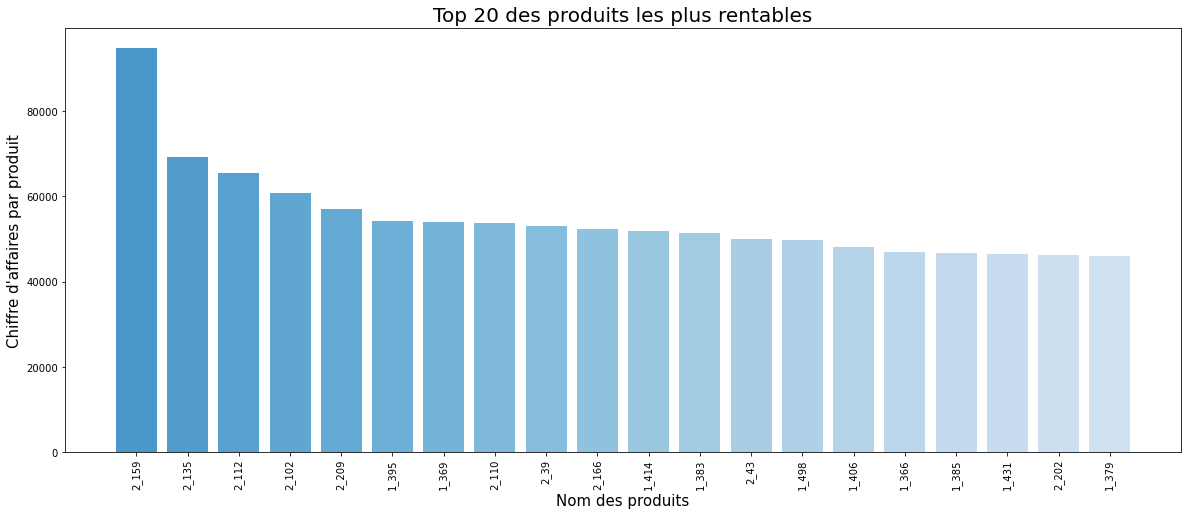

In [114]:
plt.subplots(figsize = (20,10))
height = df_transactions_al_top20_ca['CA par produit']
bars = df_transactions_al_top20_ca['id_prod']
x_pos = np.arange(len(bars))
color = cm.Blues_r(np.linspace(.4,.8, 20))
plt.bar(x_pos, height,color=color)
plt.xticks(x_pos, bars, rotation=90)
plt.subplots_adjust(bottom=0.4, top=0.99)   
plt.xlabel('Nom des produits',fontsize = 15)
plt.ylabel("Chiffre d'affaires par produit",fontsize = 15) 
plt.title('Top 20 des produits les plus rentables',fontsize = 20 )
plt.show()

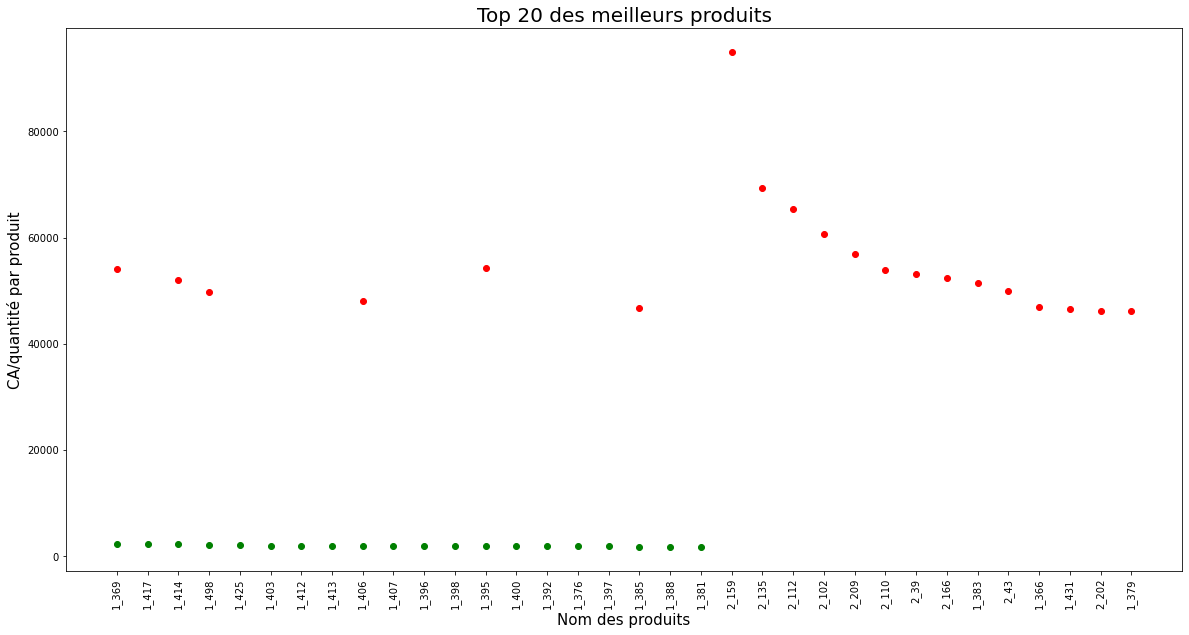

In [115]:
plt.subplots(figsize = (20,10))
x = df_transactions_al_top20_ventes['id_prod']
y =df_transactions_al_top20_ventes['Nombre total']
plt.scatter(x, y, c='green') 
x = df_transactions_al_top20_ca['id_prod']
y = df_transactions_al_top20_ca['CA par produit']
plt.xticks(rotation=90)
plt.xlabel('Nom des produits',fontsize = 15)
plt.ylabel("CA/quantité par produit",fontsize = 15) 
plt.title('Top 20 des meilleurs produits',fontsize = 20 )
plt.scatter(x, y, c='red')  
plt.show() 

On peut remarquer ici que certains produits sont à la fois très rentables et se vendent en grosse quantité. On a une liste de 6 produits ayant beaucoup de succès aupres des clients: 1_385, 1_395, 1_406, 1_498, 1_414, 1_369. Tous font partie de la catégorie 1. 

* Voyons quelle proportion de ventes cela représente sur la totalité:

In [116]:
top_produits = ['1_385', '1_395','1_406','1_498', '1_414', '1_369']

df_transactions_top_produits = df_transactions_all[df_transactions_all['id_prod'].isin(top_produits)]
df_transactions_top_produits

,id_prod,date,session_id,client_id,price,categ,sex,birth
53,1_406,2021-05-18 03:32:47.072713,s_36004,c_2831,24.81,1,m,2003
79,1_369,2022-08-12 21:21:37.350040,s_252381,c_1464,23.99,1,f,1986
83,1_414,2022-11-13 09:02:12.691434,s_296911,c_5785,23.83,1,f,1983
169,1_406,2022-02-28 00:08:57.801508,s_171929,c_4474,24.81,1,f,1990
227,1_395,2021-08-28 13:55:10.889326,s_81847,c_7587,28.99,1,f,1936
...,...,...,...,...,...,...,...,...
678955,1_406,2022-01-11 19:35:48.627292,s_148389,c_134,24.81,1,m,1954
678998,1_395,2022-10-24 14:12:18.488053,s_287374,c_485,28.99,1,m,1960
679060,1_369,2021-06-29 12:48:53.794277,s_55507,c_4917,23.99,1,f,1942
679069,1_385,2022-08-04 08:23:01.592405,s_248169,c_5692,25.99,1,m,1966


In [117]:
df_transactions_top_produits['id_prod'].nunique()

6

* Chiffre d'affaires des top 6 produits:

In [118]:
df_transactions_top_produits['price'].sum()

304899.1

* Chiffre d'affaires total:

In [119]:
df_transactions_all['price'].sum()

11853728.68

* Nombre de réference produits:

In [120]:
df_transactions_all['id_prod'].nunique()

3265

* Visualisation de la proportion du chiffre d'affaires des 6 produits sur le total:

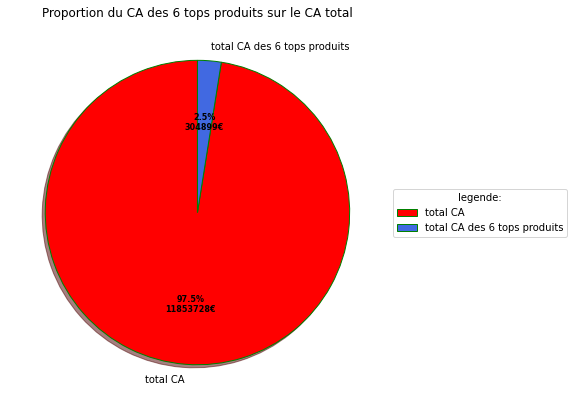

In [121]:
total_ca = ['total CA','total CA des 6 tops produits'] 
  
data = [df_transactions_all['price'].sum(), df_transactions_top_produits['price'].sum()] 
  
colors = ( "red", "royalblue") 
  
wp = { 'linewidth' : 1, 'edgecolor' : "green" } 
  
def func(pct, allvalues): 
    absolute = int(pct / 100.*np.sum(allvalues)) 
    return "{:.1f}%\n{:d}€".format(pct, absolute) 
  
fig, ax = plt.subplots(figsize =(10, 7)) 
wedges, texts, autotexts = ax.pie(data,  
                                  autopct = lambda pct: func(pct, data),   
                                  labels = total_ca, 
                                  shadow = True, 
                                  colors = colors, 
                                  startangle = 90, 
                                  wedgeprops = wp, 
                                  textprops = dict(color ="black")) 
  
ax.legend(wedges, total_ca, 
          title ="legende:", 
          loc ="center left", 
          bbox_to_anchor =(1, 0, 0.5, 1)) 
  
plt.setp(autotexts, size = 8, weight ="bold") 
ax.set_title("Proportion du CA des 6 tops produits sur le CA total") 
  
plt.show() 

* Visualisation de la proportion des 6 produits sur le nombre total de réference:

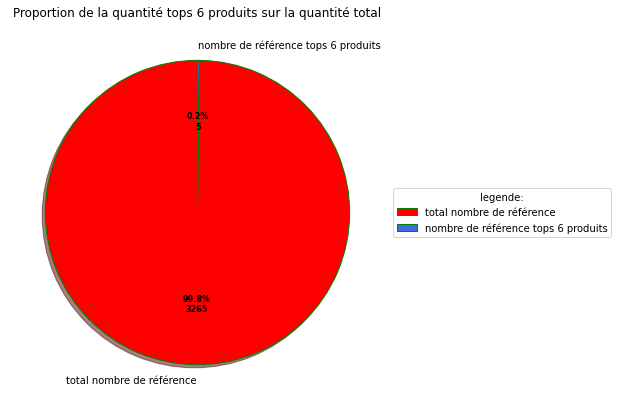

In [122]:
total_ca = ['total nombre de référence','nombre de référence tops 6 produits'] 
  
data = [df_transactions_all['id_prod'].nunique(),df_transactions_top_produits['id_prod'].nunique()] 
  
colors = ( "red", "royalblue") 
  
wp = { 'linewidth' : 1, 'edgecolor' : "green" } 
  
def func(pct, allvalues): 
    absolute = int(pct / 100.*np.sum(allvalues)) 
    return "{:.1f}%\n{:d}".format(pct, absolute) 
  
fig, ax = plt.subplots(figsize =(10, 7)) 
wedges, texts, autotexts = ax.pie(data,  
                                  autopct = lambda pct: func(pct, data),   
                                  labels = total_ca, 
                                  shadow = True, 
                                  colors = colors, 
                                  startangle = 90, 
                                  wedgeprops = wp, 
                                  textprops = dict(color ="black")) 
  
ax.legend(wedges, total_ca, 
          title ="legende:", 
          loc ="center left", 
          bbox_to_anchor =(1, 0, 0.5, 1)) 
  
plt.setp(autotexts, size = 8, weight ="bold") 
ax.set_title("Proportion de la quantité tops 6 produits sur la quantité total") 
  
plt.show() 

On peut voir ici qu'avec seulement 6 produits, qui représentent 0.2% du nombre total de référence, on obtient 2.5% de la totalité du chiffre d'affaires.

* Visualisation des flops sur le chiffre d'affaires et sur les quantité de produits vendus:

In [123]:
df_transactions_al_flop20_ventes = df_transactions_id_prod.sort_values(by='Nombre total', ascending=True).head(20)
df_transactions_al_flop20_ventes

,id_prod,Nombre total,CA par produit
3264,0_833,1,2.99
3227,2_98,1,149.74
3263,0_886,1,21.82
3218,0_1539,1,0.99
3217,0_2201,1,20.99
3240,2_81,1,86.99
3252,0_1151,1,2.99
3254,0_549,1,2.99
2669,0_1284,1,1.38
3194,2_23,1,115.99


In [124]:
df_transactions_al_flop20_ca = df_transactions_id_prod.sort_values(by='CA par produit', ascending=True).head(20)
df_transactions_al_flop20_ca

,id_prod,Nombre total,CA par produit
3218,0_1539,1,0.99
2669,0_1284,1,1.38
2981,0_1653,2,1.98
2742,0_1601,1,1.99
3259,0_541,1,1.99
3258,0_807,1,1.99
2759,0_1728,1,2.27
3256,0_1498,1,2.48
3242,0_898,2,2.54
3235,0_1840,2,2.56


* Visualisation des flops porduits:

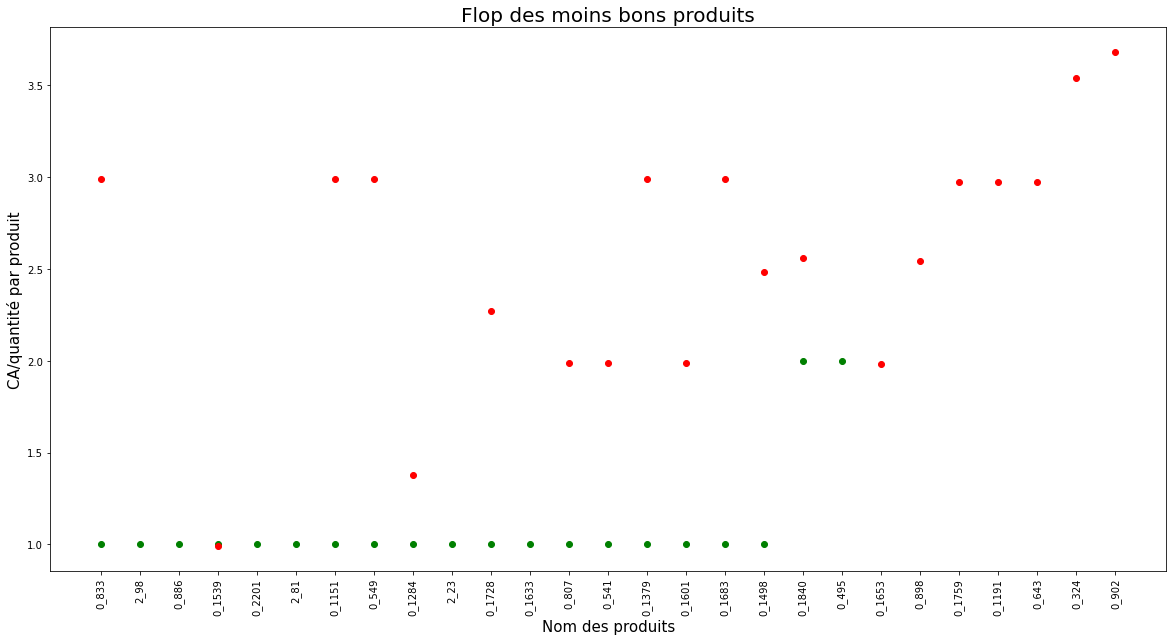

In [125]:
plt.subplots(figsize = (20,10))
x = df_transactions_al_flop20_ventes['id_prod']
y =df_transactions_al_flop20_ventes['Nombre total']
plt.scatter(x, y, c='green') 
x = df_transactions_al_flop20_ca['id_prod']
y = df_transactions_al_flop20_ca['CA par produit']
plt.xticks(rotation=90)
plt.xlabel('Nom des produits',fontsize = 15)
plt.ylabel("CA/quantité par produit",fontsize = 15) 
plt.title('Flop des moins bons produits',fontsize = 20 )
plt.scatter(x, y, c='red')  
plt.show() 

On peut remarquer ici que certains produits sont à la fois peu rentables et se vendent en petite quantité. On a une liste de 13 produits ayant le moins de succès aupres des clients: 0_833, 0_1539, 0_1151, 0_549, 0_1284, 0_1728, 0_807, 0_541, 0_1379, 0_1601, 0_1683, 0_1498, 0_1840. Tous font partie de la catégorie 0. 

In [126]:
flop_produits = ['0_833', '0_1539', '0_1151', '0_549', '0_1284', '0_1728', '0_807', '0_541', '0_1379', '0_1601', '0_1683', '0_1498', '0_1840']

df_transactions_flop_produits = df_transactions_all[df_transactions_all['id_prod'].isin(flop_produits)]
df_transactions_flop_produits = df_transactions_flop_produits.sort_values(by='price', ascending=True)
df_transactions_flop_produits

,id_prod,date,session_id,client_id,price,categ,sex,birth
285779,0_1539,2021-06-01 08:53:24.523722,s_42501,c_881,0.99,0,f,1988
338651,0_1840,2021-11-06 06:09:13.114329,s_115438,c_7572,1.28,0,f,1978
521966,0_1840,2023-01-06 06:09:13.114329,s_322712,c_7572,1.28,0,f,1978
43322,0_1284,2021-04-14 13:13:06.560397,s_20477,c_1551,1.38,0,m,1972
53794,0_1601,2021-03-07 18:55:24.042724,s_3132,c_1125,1.99,0,f,1972
539905,0_807,2021-07-24 17:43:23.555852,s_66634,c_8273,1.99,0,m,1991
553807,0_541,2021-03-08 23:45:11.524853,s_3676,c_1869,1.99,0,f,1985
55050,0_1728,2021-04-19 13:48:18.949260,s_22772,c_2768,2.27,0,f,1989
523178,0_1498,2022-02-19 08:31:04.439133,s_167516,c_1938,2.48,0,f,1979
442850,0_1151,2021-09-17 05:58:49.213439,s_91113,c_2103,2.99,0,f,1973


* Chiffre d'affaires total des 14 produits ayant le moins de succès:

In [127]:
df_transactions_flop_produits['price'].sum()

30.60000000000001

Depuis l'ouverture, ces produits n'ont apportés que 30€, il faudrait donc vérifier s'il est toujours intéressant de les garder.

* Répartition par catégorie:

In [128]:
df_transactions_categ = df_transactions_all.groupby(['id_prod', 'categ']).sum()
df_transactions_categ

,,price
id_prod,categ,
0_0,0,4657.50
0_1,0,5352.13
0_10,0,394.90
0_100,0,61.80
0_1000,0,2954.88
...,...,...
2_95,2,395.96
2_96,2,28650.18
2_97,2,2092.87


* Total du chiffre d'affaires par catégorie:

In [129]:
df_transactions_categ = df_transactions_categ.reset_index()
df_transactions_categ.rename(columns={'price': 'total_ca'}, inplace=True)
df_transactions_categ

,id_prod,categ,total_ca
0,0_0,0,4657.50
1,0_1,0,5352.13
2,0_10,0,394.90
3,0_100,0,61.80
4,0_1000,0,2954.88
...,...,...,...
3260,2_95,2,395.96
3261,2_96,2,28650.18
3262,2_97,2,2092.87
3263,2_98,2,149.74


In [130]:
df_transactions_nb_total_categ = pd.merge(df_transactions_nb_total,df_transactions_categ, how='right', on='id_prod')
df_transactions_nb_total_categ

,id_prod,Nombre total,categ,total_ca
0,0_0,1242,0,4657.50
1,0_1,487,0,5352.13
2,0_10,22,0,394.90
3,0_100,3,0,61.80
4,0_1000,432,0,2954.88
...,...,...,...,...
3260,2_95,4,2,395.96
3261,2_96,598,2,28650.18
3262,2_97,13,2,2092.87
3263,2_98,1,2,149.74


In [131]:
df_tran_nb_total_categ = df_transactions_nb_total_categ.groupby(['categ']).sum().reset_index()
df_tran_nb_total_categ

,categ,Nombre total,total_ca
0,0,415459,4419730.97
1,1,227169,4653722.69
2,2,36483,2780275.02


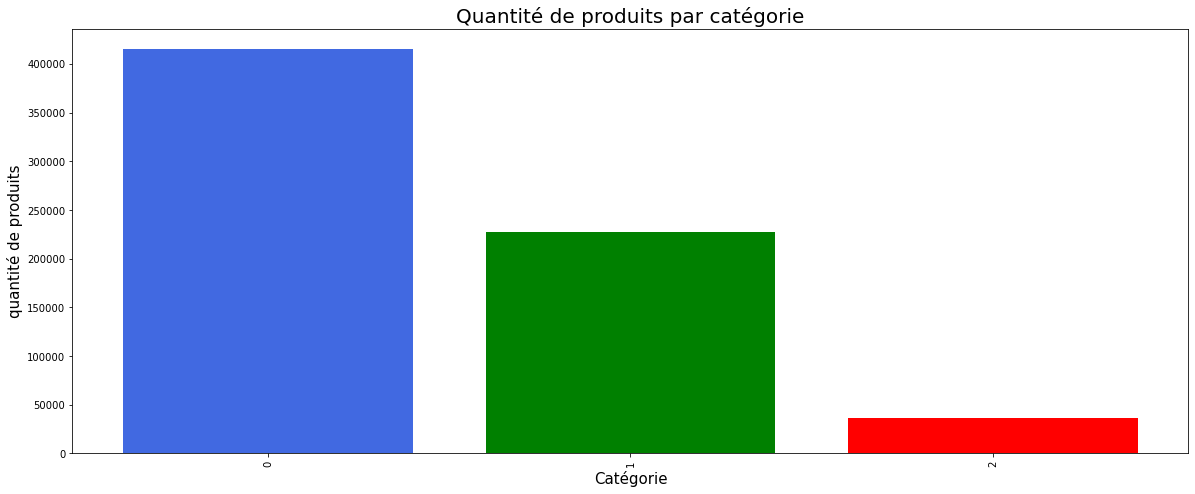

In [132]:
plt.subplots(figsize = (20,10))
height = df_tran_nb_total_categ['Nombre total']
bars = df_tran_nb_total_categ['categ']
x_pos = np.arange(len(bars))
plt.bar(x_pos, height,color=['royalblue','g','r'] )
plt.xticks(x_pos, bars, rotation=90)
plt.subplots_adjust(bottom=0.4, top=0.99)   
plt.xlabel('Catégorie',fontsize = 15)
plt.ylabel("quantité de produits",fontsize = 15) 
plt.title('Quantité de produits par catégorie',fontsize = 20 )
plt.show()

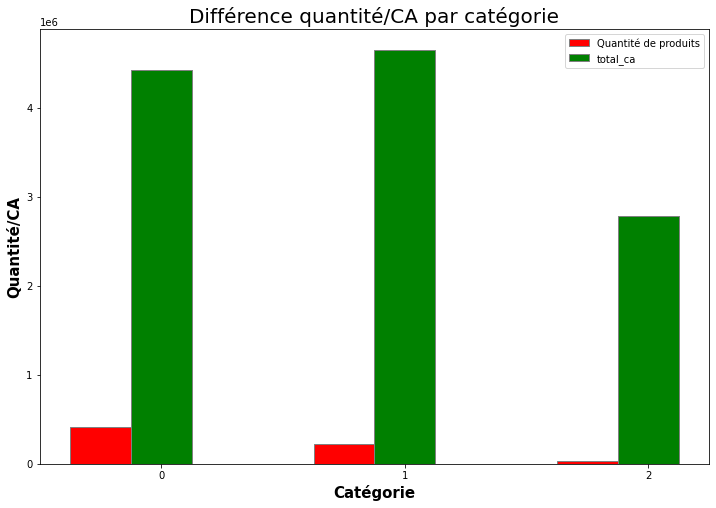

In [133]:
barWidth = 0.25
fig = plt.subplots(figsize =(12, 8))

Nombre_total = df_tran_nb_total_categ['Nombre total']
total_ca = df_tran_nb_total_categ['total_ca']

br1 = np.arange(len(Nombre_total))
br2 = [x + barWidth for x in br1]

plt.bar(br1, Nombre_total, color ='r', width = barWidth,
        edgecolor ='grey', label ='Quantité de produits')
plt.bar(br2, total_ca, color ='g', width = barWidth,
        edgecolor ='grey', label ='total_ca')

plt.xlabel('Catégorie', fontweight ='bold', fontsize = 15)
plt.ylabel('Quantité/CA', fontweight ='bold', fontsize = 15)
plt.xticks([r + barWidth for r in range(len(Nombre_total))],
        ['0', '1', '2'])
plt.title('Différence quantité/CA par catégorie',fontsize = 20 ) 
plt.legend()
plt.show()

*Nous observons ici que la catégorie 2 est la plus rentable. En effet avec très peu de quantité, nous avons un important chiffre d'affaires.*

* Observons ce que contient la catégorie 2:

In [134]:
df_transactions_all.loc[df_transactions_all['categ']==2].sort_values(by='price', ascending=False).head (20)

,id_prod,date,session_id,client_id,price,categ,sex,birth
143185,2_2,2021-06-06 23:14:33.815188,s_45088,c_2467,300.00,2,f,1997
319823,2_2,2022-03-28 21:24:28.442508,s_185980,c_659,300.00,2,f,2001
76793,2_2,2021-06-12 08:44:00.882917,s_47558,c_5237,300.00,2,m,1999
181540,2_2,2021-12-07 06:52:26.810576,s_130658,c_4958,300.00,2,m,1999
594923,2_2,2022-11-28 21:24:28.442508,s_304241,c_659,300.00,2,f,2001
354280,2_2,2022-12-06 23:14:33.815188,s_308128,c_2467,300.00,2,f,1997
645984,2_2,2021-03-26 04:33:19.697459,s_11582,c_4958,300.00,2,m,1999
36594,2_2,2022-12-07 06:52:26.810576,s_308301,c_4958,300.00,2,m,1999
638057,2_2,2021-03-07 14:07:31.004391,s_3041,c_1001,300.00,2,m,1982
350936,2_2,2022-06-07 06:52:26.810576,s_220074,c_4958,300.00,2,m,1999


*On peut voir que dans cette catégorie on trouve les articles les plus chers. Cela explique pourquoi avec une plus petite quantité nous avons pu avoir un chiffre d'affaires conséquent.*

In [135]:
data0 = df_transactions_all.loc[df_transactions_all['categ']==0]
data1 = df_transactions_all.loc[df_transactions_all['categ']==1]
data2 = df_transactions_all.loc[df_transactions_all['categ']==2]

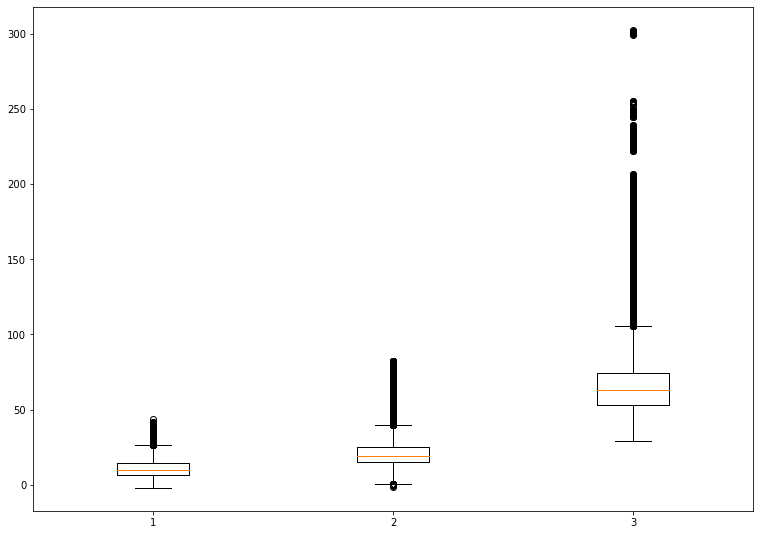

In [136]:
data_0 = data0['price']
data_1 = data1['price']
data_2 = data2['price']

np.random.seed(10)
 
data_0 = np.random.normal(data_0)
data_1 = np.random.normal(data_1)
data_2 = np.random.normal(data_2)
data = [data_0, data_1, data_2]
 
fig = plt.figure(figsize =(10, 7))
 
# Creating axes instance
ax = fig.add_axes([0, 0, 1, 1])
 
# Creating plot
bp = ax.boxplot(data)
 
# show plot
plt.show()

On peut voir que toute les catégorie possèdent beaucoup de valeurs abérrantes mais la catégorie 3 est celle qui en possède le plus.

Pour avoir une répartion plus homogène des prix, il aurait fallut avoir une sous catégorie pour chacune d'elle comprennant les tarifs élevés de la catégorie.

### Informations sur les profils des clients ainsi que la répartition du chiffre d'affaires entre eux:

* Afficher le nombre de valeurs pour chaque donnée de la colonne 'sex':

In [137]:
df_transactions_all['sex'].value_counts()

m    340826
f    338285
Name: sex, dtype: int64

*Nous constatons qu'il y a pratiquement autant de clients femmes que d'hommes.* 

* Afficher le nombre de clients par tranche d'age:

In [138]:
df_transactions_age = df_transactions_all.copy()

In [139]:
df_transactions_age

,id_prod,date,session_id,client_id,price,categ,sex,birth
0,0_1518,2022-05-20 13:21:29.043970,s_211425,c_103,4.18,0,f,1986
1,1_251,2022-02-02 07:55:19.149409,s_158752,c_8534,15.99,1,m,1988
2,0_1277,2022-06-18 15:44:33.155329,s_225667,c_6714,7.99,0,f,1968
3,2_209,2021-06-24 04:19:29.835891,s_52962,c_6941,69.99,2,m,2000
4,0_1509,2023-01-11 08:22:08.194479,s_325227,c_4232,4.99,0,m,1980
...,...,...,...,...,...,...,...,...
679327,0_1551,2022-01-15 13:05:06.246925,s_150195,c_8489,12.99,0,f,1951
679328,1_639,2022-03-19 16:03:23.429229,s_181434,c_4370,10.99,1,f,1977
679329,0_1425,2022-12-20 04:33:37.584749,s_314704,c_304,12.99,0,f,1988
679330,0_1994,2021-07-16 20:36:35.350579,s_63204,c_2227,4.98,0,m,1986


In [140]:
df_transactions_age['date'] = df_transactions_age['date'].dt.strftime('%Y')
df_transactions_age

,id_prod,date,session_id,client_id,price,categ,sex,birth
0,0_1518,2022,s_211425,c_103,4.18,0,f,1986
1,1_251,2022,s_158752,c_8534,15.99,1,m,1988
2,0_1277,2022,s_225667,c_6714,7.99,0,f,1968
3,2_209,2021,s_52962,c_6941,69.99,2,m,2000
4,0_1509,2023,s_325227,c_4232,4.99,0,m,1980
...,...,...,...,...,...,...,...,...
679327,0_1551,2022,s_150195,c_8489,12.99,0,f,1951
679328,1_639,2022,s_181434,c_4370,10.99,1,f,1977
679329,0_1425,2022,s_314704,c_304,12.99,0,f,1988
679330,0_1994,2021,s_63204,c_2227,4.98,0,m,1986


*Suite à la modification du format de la date, nous allons pouvoir faire une simple déduction pour avoir l'age du client au moment de l'achat.*

In [141]:
df_transactions_age.dtypes

id_prod        object
date           object
session_id     object
client_id      object
price         float64
categ          object
sex            object
birth          object
dtype: object

In [142]:
df_transactions_age['date']=df_transactions_age['date'].astype(int)
df_transactions_age['birth']=df_transactions_age['birth'].astype(int)                                                        

* Création de la colonne age:

In [143]:
df_transactions_age['age'] = df_transactions_age['date'] - df_transactions_age['birth']
df_transactions_age

,id_prod,date,session_id,client_id,price,categ,sex,birth,age
0,0_1518,2022,s_211425,c_103,4.18,0,f,1986,36
1,1_251,2022,s_158752,c_8534,15.99,1,m,1988,34
2,0_1277,2022,s_225667,c_6714,7.99,0,f,1968,54
3,2_209,2021,s_52962,c_6941,69.99,2,m,2000,21
4,0_1509,2023,s_325227,c_4232,4.99,0,m,1980,43
...,...,...,...,...,...,...,...,...,...
679327,0_1551,2022,s_150195,c_8489,12.99,0,f,1951,71
679328,1_639,2022,s_181434,c_4370,10.99,1,f,1977,45
679329,0_1425,2022,s_314704,c_304,12.99,0,f,1988,34
679330,0_1994,2021,s_63204,c_2227,4.98,0,m,1986,35


In [144]:
df_transactions_age = df_transactions_age.loc[:,['id_prod','session_id', 'client_id', 'price', 'categ', 'sex', 'age']]
df_transactions_age

,id_prod,session_id,client_id,price,categ,sex,age
0,0_1518,s_211425,c_103,4.18,0,f,36
1,1_251,s_158752,c_8534,15.99,1,m,34
2,0_1277,s_225667,c_6714,7.99,0,f,54
3,2_209,s_52962,c_6941,69.99,2,m,21
4,0_1509,s_325227,c_4232,4.99,0,m,43
...,...,...,...,...,...,...,...
679327,0_1551,s_150195,c_8489,12.99,0,f,71
679328,1_639,s_181434,c_4370,10.99,1,f,45
679329,0_1425,s_314704,c_304,12.99,0,f,34
679330,0_1994,s_63204,c_2227,4.98,0,m,35


In [145]:
df_transactions_sex = df_transactions_age.groupby('sex')['age'].value_counts()
df_transactions_sex

sex  age
f    44     12419
     43     11984
     34     11737
     42     11549
     39     11475
            ...  
m    93        89
     92        85
     89        78
     90        59
     94        15
Name: age, Length: 156, dtype: int64

*Nous avons compter ici pour chaque age combien de ventes nous avons eu par sex.*

In [146]:
data={'nb_ventes_par_sex':df_transactions_sex}
df_transactions_sex_nb_total = pd.DataFrame(data=data)
df_transactions_sex_nb_total = df_transactions_sex_nb_total.reset_index()
df_transactions_sex_nb_total

,sex,age,nb_ventes_par_sex
0,f,44,12419
1,f,43,11984
2,f,34,11737
3,f,42,11549
4,f,39,11475
...,...,...,...
151,m,93,89
152,m,92,85
153,m,89,78
154,m,90,59


* Création de la colonne par tranche d'age:

Nous allons créer ici 5 tranches d'ages représentant au mieux la population. Les plus jeunes (16-20), les etudiants (20-30), les actifs (30-50), les plus agés (50_65) et les retraités (+65).  

In [147]:
bins = [16, 20, 30, 50, 65, 94]
df_transactions_sex_nb_total['intervale_age'] = pd.cut(df_transactions_sex_nb_total['age'], bins)
df_transactions_sex_nb_total

,sex,age,nb_ventes_par_sex,intervale_age
0,f,44,12419,"(30, 50]"
1,f,43,11984,"(30, 50]"
2,f,34,11737,"(30, 50]"
3,f,42,11549,"(30, 50]"
4,f,39,11475,"(30, 50]"
...,...,...,...,...
151,m,93,89,"(65, 94]"
152,m,92,85,"(65, 94]"
153,m,89,78,"(65, 94]"
154,m,90,59,"(65, 94]"


In [148]:
df_transactions_sex_nb_total = df_transactions_sex_nb_total.groupby(['intervale_age', 'sex']).sum()
df_transactions_sex_nb_total = df_transactions_sex_nb_total.drop(columns='age')
df_transactions_sex_nb_total

nb_ventes_par_sex
intervale_age sex                   
(16, 20]      f                12609
              m                12800
(20, 30]      f                29247
              m                31899
(30, 50]      f               201420
              m               213352
(50, 65]      f                64714
              m                58684
(65, 94]      f                30295
              m                24091

In [149]:
df_transactions_sex_nb_total = df_transactions_sex_nb_total.reset_index()

In [150]:
df_transactions_sex_nb_total

,intervale_age,sex,nb_ventes_par_sex
0,"(16, 20]",f,12609
1,"(16, 20]",m,12800
2,"(20, 30]",f,29247
3,"(20, 30]",m,31899
4,"(30, 50]",f,201420
5,"(30, 50]",m,213352
6,"(50, 65]",f,64714
7,"(50, 65]",m,58684
8,"(65, 94]",f,30295
9,"(65, 94]",m,24091


In [151]:
df_transactions_sex_nb_total['intervale_age']=df_transactions_sex_nb_total['intervale_age'].astype(object)

In [152]:
f = df_transactions_sex_nb_total.loc[df_transactions_sex_nb_total['sex']=='f']
m = df_transactions_sex_nb_total.loc[df_transactions_sex_nb_total['sex']=='m']

* Afichage du graphique montrant le nombre de ventes effectuées hommes/femmes par tranche d'age:

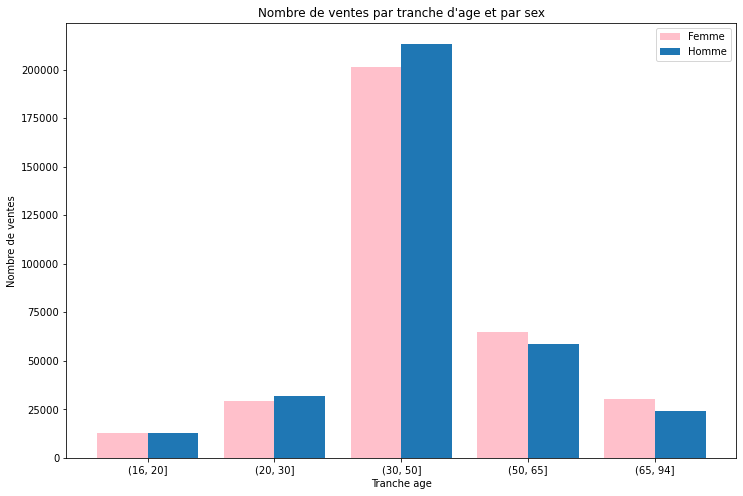

In [153]:
fig = plt.subplots(figsize =(12, 8))
X = m['intervale_age']
Ygirls = f['nb_ventes_par_sex']
Zboys = m['nb_ventes_par_sex']
  
X_axis = np.arange(len(X))
  
plt.bar(X_axis - 0.2, Ygirls, 0.4, label = 'Femme', color='pink')
plt.bar(X_axis + 0.2, Zboys, 0.4, label = 'Homme')
  
plt.xticks(X_axis, X)
plt.xlabel("Tranche age")
plt.ylabel("Nombre de ventes")
plt.title("Nombre de ventes par tranche d'age et par sex")
plt.legend()
plt.show()

On observe ici que les 30-50 ans sont les plus nombreux et c'est la seule catégorie ou l'on peut voir que les hommes sont largement plus nombreux que les femmes.

* Voyons maintenant le nombre de cients par tranche d'age:

In [154]:
df_transactions['client_id'].nunique()

8600

In [155]:
df_nb_transactions_age = df_transactions_age.groupby(by='age', as_index=False).agg({'client_id': pd.Series.nunique})
df_nb_transactions_age

,age,client_id
0,17,435
1,18,574
2,19,607
3,20,367
4,21,356
...,...,...
73,90,15
74,91,12
75,92,11
76,93,6


* Création des tranches d'ages:

In [156]:
bins = [16, 20, 30, 50, 65, 94]
df_nb_transactions_age['intervale_age'] = pd.cut(df_nb_transactions_age['age'], bins)
df_nb_transactions_age

,age,client_id,intervale_age
0,17,435,"(16, 20]"
1,18,574,"(16, 20]"
2,19,607,"(16, 20]"
3,20,367,"(16, 20]"
4,21,356,"(20, 30]"
...,...,...,...
73,90,15,"(65, 94]"
74,91,12,"(65, 94]"
75,92,11,"(65, 94]"
76,93,6,"(65, 94]"


In [157]:
df_nb_transactions_age = df_nb_transactions_age.groupby(['intervale_age']).sum()
df_nb_transactions_age = df_nb_transactions_age.drop(columns='age')
df_nb_transactions_age

,client_id
intervale_age,
"(16, 20]",1983
"(20, 30]",4113
"(30, 50]",9731
"(50, 65]",5412
"(65, 94]",2947


In [158]:
df_nb_transactions_age = df_nb_transactions_age.reset_index()

In [159]:
df_nb_transactions_age = df_nb_transactions_age.rename(columns={'client_id': 'nb_clients'})

In [160]:
df_nb_transactions_age_top = df_nb_transactions_age.sort_values(by='nb_clients', ascending=True)
df_nb_transactions_age_top

,intervale_age,nb_clients
0,"(16, 20]",1983
4,"(65, 94]",2947
1,"(20, 30]",4113
3,"(50, 65]",5412
2,"(30, 50]",9731


* Graphique montrant le nombre de clients par tranche d'age:

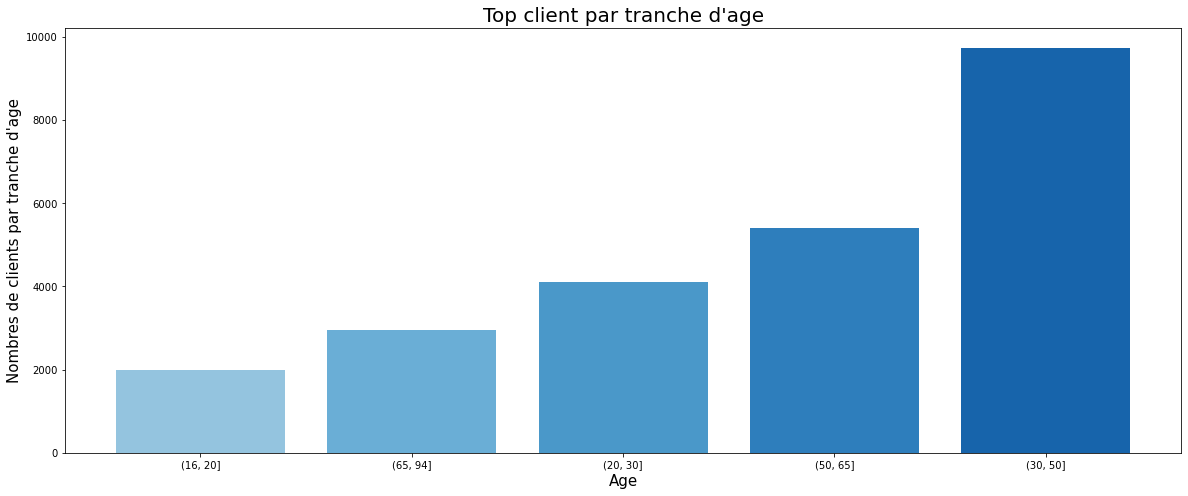

In [161]:
plt.subplots(figsize = (20,10))
height = df_nb_transactions_age_top['nb_clients']
bars = df_nb_transactions_age_top['intervale_age']
x_pos= np.arange(len(bars))
color = cm.Blues(np.linspace(.4,.8, 5))
plt.bar(x_pos, height, color=color)
plt.xticks(x_pos, bars, rotation=0)
plt.subplots_adjust(bottom=0.4, top=0.99)   
plt.xlabel('Age',fontsize = 15)
plt.ylabel("Nombres de clients par tranche d'age",fontsize = 15) 
plt.title("Top client par tranche d'age",fontsize = 20 )
plt.show()

* Calcul du chiffre d'affaires par catégorie, sex et tranche d'age:

In [162]:
bins = [16, 20, 30, 50, 65, 94]
df_transactions_age['age_cat'] = pd.cut(df_transactions_age['age'], bins)
df_transactions_age

,id_prod,session_id,client_id,price,categ,sex,age,age_cat
0,0_1518,s_211425,c_103,4.18,0,f,36,"(30, 50]"
1,1_251,s_158752,c_8534,15.99,1,m,34,"(30, 50]"
2,0_1277,s_225667,c_6714,7.99,0,f,54,"(50, 65]"
3,2_209,s_52962,c_6941,69.99,2,m,21,"(20, 30]"
4,0_1509,s_325227,c_4232,4.99,0,m,43,"(30, 50]"
...,...,...,...,...,...,...,...,...
679327,0_1551,s_150195,c_8489,12.99,0,f,71,"(65, 94]"
679328,1_639,s_181434,c_4370,10.99,1,f,45,"(30, 50]"
679329,0_1425,s_314704,c_304,12.99,0,f,34,"(30, 50]"
679330,0_1994,s_63204,c_2227,4.98,0,m,35,"(30, 50]"


In [163]:
df_transactions_age_group = df_transactions_age.groupby(['age_cat','sex','categ']).sum()
df_transactions_age_group = df_transactions_age_group.reset_index()
df_transactions_age_group = df_transactions_age_group.drop(columns=['age'])
df_transactions_age_group

,age_cat,sex,categ,price
0,"(16, 20]",f,0,30990.80
1,"(16, 20]",f,1,97719.99
2,"(16, 20]",f,2,374267.88
3,"(16, 20]",m,0,29242.42
4,"(16, 20]",m,1,100135.03
5,"(16, 20]",m,2,392507.52
6,"(20, 30]",f,0,89909.18
7,"(20, 30]",f,1,213007.18
8,"(20, 30]",f,2,777877.36
9,"(20, 30]",m,0,86855.06


In [164]:
categorie_0 = df_transactions_age_group.loc[df_transactions_age_group['categ']==0]
categorie_1 = df_transactions_age_group.loc[df_transactions_age_group['categ']==1]
categorie_2 = df_transactions_age_group.loc[df_transactions_age_group['categ']==2]

* Représentation graphique du chiffre d'affaires par catégorie, sex et tranche d'age:

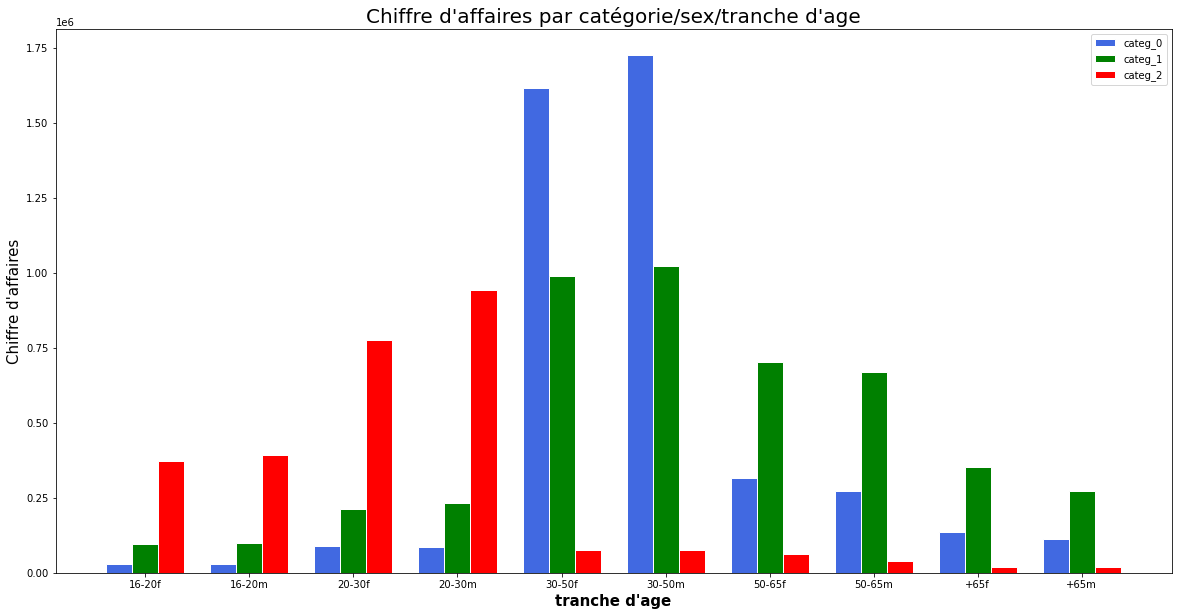

In [165]:
plt.subplots(figsize = (20,10))
barWidth = 0.25

bars1 = categorie_0['price']
bars2 = categorie_1['price']
bars3 = categorie_2['price']

r1 = np.arange(len(bars1))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]

plt.bar(r1, bars1, color='royalblue', width=barWidth, edgecolor='white', label='categ_0')
plt.bar(r2, bars2, color='g', width=barWidth, edgecolor='white', label='categ_1')
plt.bar(r3, bars3, color='r', width=barWidth, edgecolor='white', label='categ_2')

plt.xlabel('group', fontweight='bold')
plt.xticks([r + barWidth for r in range(len(bars1))], ['16-20f','16-20m', '20-30f','20-30m', '30-50f','30-50m', '50-65f','50-65m', '+65f','+65m'])
plt.xlabel("tranche d'age",fontsize = 15)
plt.ylabel("Chiffre d'affaires",fontsize = 15) 
plt.title("Chiffre d'affaires par catégorie/sex/tranche d'age",fontsize = 20 )

plt.legend()
plt.show()

* Chiffre d'affaires par catégorie en fonction de l'age:

In [166]:
df_transactions_age_categ = df_transactions_age.groupby(['age_cat','categ']).sum()
df_transactions_age_categ = df_transactions_age_categ.reset_index()
df_transactions_age_categ = df_transactions_age_categ.drop(columns=['age'])
df_transactions_age_categ

,age_cat,categ,price
0,"(16, 20]",0,60233.22
1,"(16, 20]",1,197855.02
2,"(16, 20]",2,766775.40
3,"(20, 30]",0,176764.24
4,"(20, 30]",1,444264.07
5,"(20, 30]",2,1722241.86
6,"(30, 50]",0,3344061.31
7,"(30, 50]",1,2014324.53
8,"(30, 50]",2,149966.57
9,"(50, 65]",0,589203.59


In [167]:
categ_0 = df_transactions_age_categ.loc[df_transactions_age_categ['categ']==0]
categ_1 = df_transactions_age_categ.loc[df_transactions_age_categ['categ']==1]
categ_2 = df_transactions_age_categ.loc[df_transactions_age_categ['categ']==2]

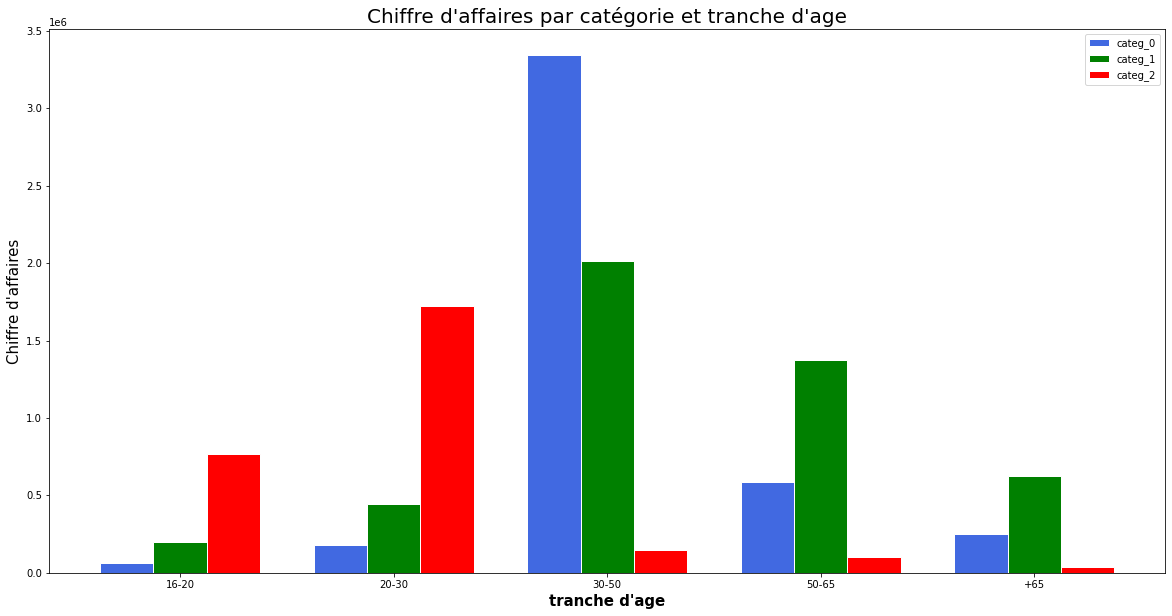

In [168]:
plt.subplots(figsize = (20,10))
barWidth = 0.25

bars1 = categ_0['price']
bars2 = categ_1['price']
bars3 = categ_2['price']

r1 = np.arange(len(bars1))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]

plt.bar(r1, bars1, color='royalblue', width=barWidth, edgecolor='white', label='categ_0')
plt.bar(r2, bars2, color='g', width=barWidth, edgecolor='white', label='categ_1')
plt.bar(r3, bars3, color='r', width=barWidth, edgecolor='white', label='categ_2')

plt.xlabel('group', fontweight='bold')
plt.xticks([r + barWidth for r in range(len(bars1))], ['16-20', '20-30', '30-50', '50-65', '+65'])
plt.xlabel("tranche d'age",fontsize = 15)
plt.ylabel("Chiffre d'affaires",fontsize = 15) 
plt.title("Chiffre d'affaires par catégorie et tranche d'age",fontsize = 20 )

plt.legend()
plt.show()

* Représentation du nombre de ventes par tranches d'age:

In [169]:
df_transactions_cat_age = df_transactions_age.groupby(['age_cat','sex','categ'])['id_prod'].value_counts()
df_transactions_cat_age

age_cat   sex  categ  id_prod
(16, 20]  f    0      0_1421     17
                      0_1458     16
                      0_1468     16
                      0_1083     15
                      0_1357     15
                                 ..
(65, 94]  m    2      2_228       1
                      2_230       1
                      2_41        1
                      2_67        1
                      2_95        1
Name: id_prod, Length: 21267, dtype: int64

In [170]:
data={'nb_ventes_par_cat':df_transactions_cat_age}
df_transactions_cat_age = pd.DataFrame(data=data)
df_transactions_cat_age = df_transactions_cat_age.reset_index()

In [171]:
df_transactions_cat_age = df_transactions_cat_age.drop(columns='id_prod')

In [172]:
df_transactions_cat_age

,age_cat,sex,categ,nb_ventes_par_cat
0,"(16, 20]",f,0,17
1,"(16, 20]",f,0,16
2,"(16, 20]",f,0,16
3,"(16, 20]",f,0,15
4,"(16, 20]",f,0,15
...,...,...,...,...
21262,"(65, 94]",m,2,1
21263,"(65, 94]",m,2,1
21264,"(65, 94]",m,2,1
21265,"(65, 94]",m,2,1


In [173]:
df_transactions_cat_age = df_transactions_cat_age.groupby(['age_cat','sex','categ']).sum()

In [174]:
df_transactions_cat_age = df_transactions_cat_age.reset_index()

In [175]:
df_transactions_cat_age

,age_cat,sex,categ,nb_ventes_par_cat
0,"(16, 20]",f,0,2897
1,"(16, 20]",f,1,4729
2,"(16, 20]",f,2,4983
3,"(16, 20]",m,0,2771
4,"(16, 20]",m,1,4851
5,"(16, 20]",m,2,5178
6,"(20, 30]",f,0,8481
7,"(20, 30]",f,1,10413
8,"(20, 30]",f,2,10353
9,"(20, 30]",m,0,8114


In [176]:
cat_0 = df_transactions_cat_age.loc[df_transactions_cat_age['categ']==0].copy()
cat_1 = df_transactions_cat_age.loc[df_transactions_cat_age['categ']==1].copy()
cat_2 = df_transactions_cat_age.loc[df_transactions_cat_age['categ']==2].copy()

In [177]:
cat_0['age_cat']=cat_0['age_cat'].astype(object)
cat_1['age_cat']=cat_1['age_cat'].astype(object)
cat_2['age_cat']=cat_2['age_cat'].astype(object)

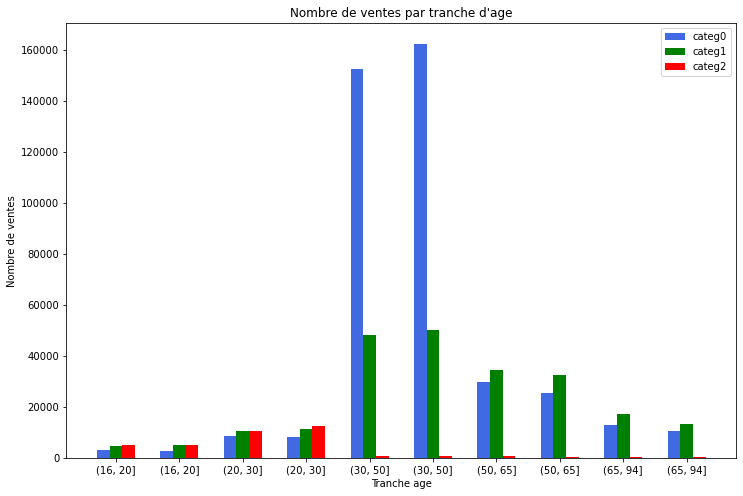

In [178]:
fig = plt.subplots(figsize =(12, 8))
X = cat_0['age_cat']
categ0 = cat_0['nb_ventes_par_cat']
categ1 = cat_1['nb_ventes_par_cat']
categ2 = cat_2['nb_ventes_par_cat']

X_axis = np.arange(len(X))
  
plt.bar(X_axis - 0.2, categ0, 0.2, label = 'categ0', color='royalblue')
plt.bar(X_axis , categ1, 0.2, label = 'categ1', color='g')
plt.bar(X_axis + 0.2, categ2, 0.2, label = 'categ2', color='r')

plt.xticks(X_axis, X)
plt.xlabel("Tranche age")
plt.ylabel("Nombre de ventes")
plt.title("Nombre de ventes par tranche d'age")
plt.legend()
plt.show()

In [179]:
df_transactions_age.describe()

,price,age
count,679111.000000,679111.000000
mean,17.454773,43.859354
std,18.328998,13.591033
min,0.620000,17.000000
25%,8.870000,35.000000
50%,13.990000,42.000000
75%,18.990000,51.000000
max,300.000000,94.000000


Représentation du chiffre d'affaires par tranches d'age:

In [180]:
df_ca_age = df_transactions_age.copy()

In [181]:
df_ca_age = df_ca_age.groupby(['age']).sum()
df_ca_age = df_ca_age.reset_index()
df_ca_age

,age,price
0,17,241265.83
1,18,384592.43
2,19,221900.10
3,20,177105.28
4,21,172091.75
...,...,...
73,90,4114.03
74,91,3455.02
75,92,3309.62
76,93,2115.62


In [182]:
bins = [16, 20, 30, 50, 65, 94]
df_ca_age['intervale_age'] = pd.cut(df_ca_age['age'], bins)
df_ca_age

,age,price,intervale_age
0,17,241265.83,"(16, 20]"
1,18,384592.43,"(16, 20]"
2,19,221900.10,"(16, 20]"
3,20,177105.28,"(16, 20]"
4,21,172091.75,"(20, 30]"
...,...,...,...
73,90,4114.03,"(65, 94]"
74,91,3455.02,"(65, 94]"
75,92,3309.62,"(65, 94]"
76,93,2115.62,"(65, 94]"


In [183]:
df_ca_age = df_ca_age.drop(columns='age')
df_ca_age

,price,intervale_age
0,241265.83,"(16, 20]"
1,384592.43,"(16, 20]"
2,221900.10,"(16, 20]"
3,177105.28,"(16, 20]"
4,172091.75,"(20, 30]"
...,...,...
73,4114.03,"(65, 94]"
74,3455.02,"(65, 94]"
75,3309.62,"(65, 94]"
76,2115.62,"(65, 94]"


In [184]:
df_ca_age = df_ca_age.groupby(['intervale_age']).sum()
df_ca_age = df_ca_age.reset_index()
df_ca_age_top = df_ca_age.sort_values(by='price', ascending=True)
df_ca_age_top

,intervale_age,price
4,"(65, 94]",911697.04
0,"(16, 20]",1024863.64
3,"(50, 65]",2065545.42
1,"(20, 30]",2343270.17
2,"(30, 50]",5508352.41


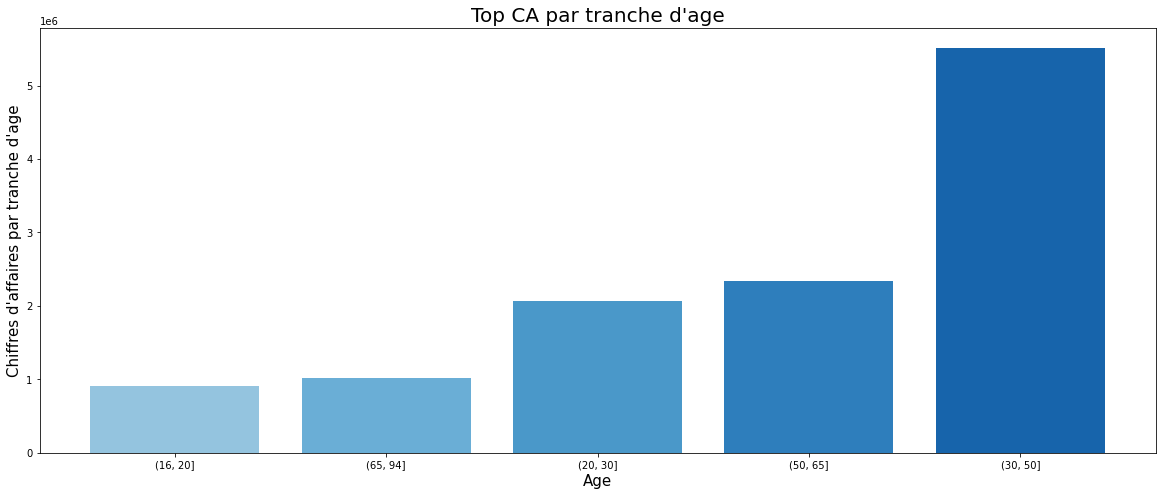

In [185]:
plt.subplots(figsize = (20,10))
height = df_ca_age_top['price']
bars = df_nb_transactions_age_top['intervale_age']
x_pos = np.arange(len(bars))
color = cm.Blues(np.linspace(.4,.8, 5))
plt.bar(x_pos, height, color=color)
plt.xticks(x_pos, bars, rotation=0)
plt.subplots_adjust(bottom=0.4, top=0.99)   
plt.xlabel('Age',fontsize = 15)
plt.ylabel("Chiffres d'affaires par tranche d'age",fontsize = 15) 
plt.title("Top CA par tranche d'age",fontsize = 20 )
plt.show()

* Observation des inégalités de ventes par tranches d'age via une courbe de Lorenz: 

In [186]:
df_ca_age = df_ca_age.sort_values(by='price', ascending=True)
df_ca_age

,intervale_age,price
4,"(65, 94]",911697.04
0,"(16, 20]",1024863.64
3,"(50, 65]",2065545.42
1,"(20, 30]",2343270.17
2,"(30, 50]",5508352.41


* Part du chiffre d'affaires pas tranche d'age:

In [187]:
df_ca_age['part_ca'] = df_ca_age['price']/(df_ca_age['price'].sum())
df_ca_age

,intervale_age,price,part_ca
4,"(65, 94]",911697.04,0.076912
0,"(16, 20]",1024863.64,0.086459
3,"(50, 65]",2065545.42,0.174253
1,"(20, 30]",2343270.17,0.197682
2,"(30, 50]",5508352.41,0.464694


* Somme cummulée de la part du chiffre d'affaires pas tranche d'age:

In [188]:
df_ca_age['cum_percent_part_ca']= df_ca_age['part_ca'].cumsum()
df_ca_age

,intervale_age,price,part_ca,cum_percent_part_ca
4,"(65, 94]",911697.04,0.076912,0.076912
0,"(16, 20]",1024863.64,0.086459,0.163371
3,"(50, 65]",2065545.42,0.174253,0.337624
1,"(20, 30]",2343270.17,0.197682,0.535306
2,"(30, 50]",5508352.41,0.464694,1.000000


* Part du nombre de clients pas tranche d'age:

In [189]:
df_nb_clients_tranche_age = df_nb_transactions_age_top.sort_values(by='intervale_age', ascending=True)
df_nb_clients_tranche_age

,intervale_age,nb_clients
0,"(16, 20]",1983
1,"(20, 30]",4113
2,"(30, 50]",9731
3,"(50, 65]",5412
4,"(65, 94]",2947


* Jointure entre les deux tables: 

In [190]:
df_lorenz_curve = pd.merge(df_ca_age, df_nb_clients_tranche_age, how='left', on='intervale_age')
df_lorenz_curve

,intervale_age,price,part_ca,cum_percent_part_ca,nb_clients
0,"(65, 94]",911697.04,0.076912,0.076912,2947
1,"(16, 20]",1024863.64,0.086459,0.163371,1983
2,"(50, 65]",2065545.42,0.174253,0.337624,5412
3,"(20, 30]",2343270.17,0.197682,0.535306,4113
4,"(30, 50]",5508352.41,0.464694,1.000000,9731


* Part et somme cummulée de la part du nombre de clients pas tranche d'age:

In [191]:
df_lorenz_curve['masse_nb_ventes'] = df_lorenz_curve['nb_clients']/(df_lorenz_curve['nb_clients'].sum())
df_lorenz_curve['cum_percent_masse_nb_ventes']= df_lorenz_curve['masse_nb_ventes'].cumsum()
df_lorenz_curve

,intervale_age,price,part_ca,cum_percent_part_ca,nb_clients,masse_nb_ventes,cum_percent_masse_nb_ventes
0,"(65, 94]",911697.04,0.076912,0.076912,2947,0.121847,0.121847
1,"(16, 20]",1024863.64,0.086459,0.163371,1983,0.081990,0.203837
2,"(50, 65]",2065545.42,0.174253,0.337624,5412,0.223766,0.427603
3,"(20, 30]",2343270.17,0.197682,0.535306,4113,0.170057,0.597660
4,"(30, 50]",5508352.41,0.464694,1.000000,9731,0.402340,1.000000


* Visualisation de la courbe de Lorenz:

In [192]:
X = np.array(df_lorenz_curve['cum_percent_masse_nb_ventes'])
X=np.insert(X,0,0)
Y = np.array(df_lorenz_curve['cum_percent_part_ca'])
Y=np.insert(Y,0,0)

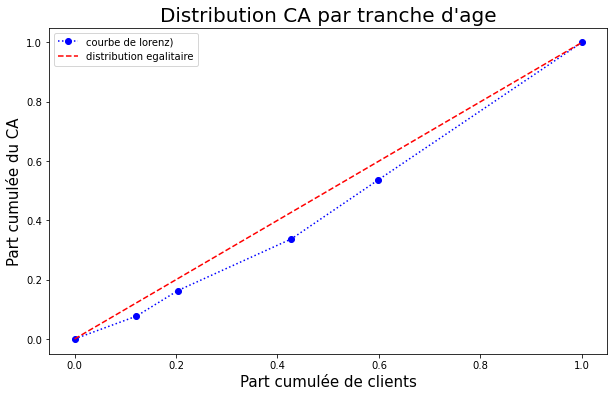

In [193]:
plt.figure(figsize = (10, 6))
x=np.array([0, 0.2, 0.4, 0.6, 0.8, 1.0])
y=x
x1 = np.array(X)
y1 = np.array(Y)
plt.plot(x1, y1,"b:o" , label="courbe de lorenz)")
plt.plot(x, y, "r--" , label="distribution egalitaire")
plt.legend()
plt.xlabel("Part cumulée de clients",fontsize = 15)
plt.ylabel("Part cumulée du CA",fontsize = 15) 
plt.title("Distribution CA par tranche d'age",fontsize = 20 )
plt.show()

* Exemple de lecture du graphique:

Nous avons par exemple:

    Environ 12.1% des clients (représentés pas les plus de 65 ans) réalisent un peu plus de 7.6% du chiffre d'affaires.
    Environ 8.1% des clients (représentés pas les 16-20 ans) réalisent un peu plus de 8.6% du chiffre d'affaires.
    Environ 22.3% des clients (représentés pas les 50-65 ans) réalisent un peu plus de 17.4% du chiffre d'affaires.
    Environ 17.0% des clients (représentés pas les 20-30 ans) réalisent un peu plus de 19.8% du chiffre d'affaires.
    Environ 40.2% des clients (représentés pas les 16-20 ans) réalisent un peu plus de 46.4% du chiffre d'affaires.

* Calcul de l'indice de Gini:

In [194]:
df_lorenz_curve1 = df_lorenz_curve.copy()

In [195]:
df_lorenz_curve1

,intervale_age,price,part_ca,cum_percent_part_ca,nb_clients,masse_nb_ventes,cum_percent_masse_nb_ventes
0,"(65, 94]",911697.04,0.076912,0.076912,2947,0.121847,0.121847
1,"(16, 20]",1024863.64,0.086459,0.163371,1983,0.081990,0.203837
2,"(50, 65]",2065545.42,0.174253,0.337624,5412,0.223766,0.427603
3,"(20, 30]",2343270.17,0.197682,0.535306,4113,0.170057,0.597660
4,"(30, 50]",5508352.41,0.464694,1.000000,9731,0.402340,1.000000


In [196]:
df_lorenz_curve1['cum_percent_masse_nb_ventes'] 

0    0.121847
1    0.203837
2    0.427603
3    0.597660
4    1.000000
Name: cum_percent_masse_nb_ventes, dtype: float64

In [197]:
df_lorenz_curve1['cum_percent_part_ca'] 

0    0.076912
1    0.163371
2    0.337624
3    0.535306
4    1.000000
Name: cum_percent_part_ca, dtype: float64

In [198]:
a1 = (0.121847*0.076912)/2
a2 = ((0.203837-0.121847)*(0.163371+0.076912))/2
a3 = ((0.427603-0.203837)*(0.337624+0.163371))/2
a4 = ((0.597660-0.427603)*(0.535306+0.337624))/2
a5 = ((1.000000-0.597660)*(1.000000+0.535306))/2

In [199]:
aire_sous_courbe_lorenz = a1+a2+a3+a4+a5
aire_sous_courbe_lorenz

0.453670409927

In [200]:
aire_sous_droite_equirépartition = 1*1/2
aire_sous_droite_equirépartition

0.5

Soit l'aire correspondant à la surface S= l'aire entre la courbe de lorenz et la courbe x=y.

*Plus les inégalités sont importantes dans la population considérée, plus S est importante.*

Nous avons donc:

In [201]:
S = aire_sous_droite_equirépartition - aire_sous_courbe_lorenz
S

0.046329590073000027

Soit pour l'indice de Gini:

In [202]:
I_gini = S/(S+aire_sous_courbe_lorenz)
I_gini

0.09265918014600005

ou alors:

In [203]:
2*S

0.09265918014600005

0<I_gini<0.5 donc la concentration est très faible.

L'inégalité sera d'autant plus forte que l'indice de Gini se rapprochera de 1. Nous sommes donc dans une situation plus proche de l'égalité que de l'inégalité.

La répartition du chiffre d'affaires est donc plutot égalitaire entre les tranches d'ages.

* Autre méthode de calcul de l'indice de Gini:

In [204]:
df_lorenz_curve2 = df_lorenz_curve.copy()

In [205]:
df_lorenz_curve2

,intervale_age,price,part_ca,cum_percent_part_ca,nb_clients,masse_nb_ventes,cum_percent_masse_nb_ventes
0,"(65, 94]",911697.04,0.076912,0.076912,2947,0.121847,0.121847
1,"(16, 20]",1024863.64,0.086459,0.163371,1983,0.081990,0.203837
2,"(50, 65]",2065545.42,0.174253,0.337624,5412,0.223766,0.427603
3,"(20, 30]",2343270.17,0.197682,0.535306,4113,0.170057,0.597660
4,"(30, 50]",5508352.41,0.464694,1.000000,9731,0.402340,1.000000


In [206]:
df_lorenz_curve2['F'] = df_lorenz_curve2.cum_percent_masse_nb_ventes.rolling(2).sum() 
df_lorenz_curve2

,intervale_age,price,part_ca,cum_percent_part_ca,nb_clients,masse_nb_ventes,cum_percent_masse_nb_ventes,F
0,"(65, 94]",911697.04,0.076912,0.076912,2947,0.121847,0.121847,NaN
1,"(16, 20]",1024863.64,0.086459,0.163371,1983,0.081990,0.203837,0.325684
2,"(50, 65]",2065545.42,0.174253,0.337624,5412,0.223766,0.427603,0.631440
3,"(20, 30]",2343270.17,0.197682,0.535306,4113,0.170057,0.597660,1.025263
4,"(30, 50]",5508352.41,0.464694,1.000000,9731,0.402340,1.000000,1.597660


In [207]:
df_lorenz_curve2['F'].fillna('0.121847',inplace=True)
df_lorenz_curve2

,intervale_age,price,part_ca,cum_percent_part_ca,nb_clients,masse_nb_ventes,cum_percent_masse_nb_ventes,F
0,"(65, 94]",911697.04,0.076912,0.076912,2947,0.121847,0.121847,0.121847
1,"(16, 20]",1024863.64,0.086459,0.163371,1983,0.081990,0.203837,0.325684
2,"(50, 65]",2065545.42,0.174253,0.337624,5412,0.223766,0.427603,0.63144
3,"(20, 30]",2343270.17,0.197682,0.535306,4113,0.170057,0.597660,1.025263
4,"(30, 50]",5508352.41,0.464694,1.000000,9731,0.402340,1.000000,1.59766


In [208]:
df_lorenz_curve2['F']=df_lorenz_curve2['F'].astype(float)

In [209]:
df_lorenz_curve2['I'] = df_lorenz_curve2['part_ca']*df_lorenz_curve2['F']
df_lorenz_curve2

,intervale_age,price,part_ca,cum_percent_part_ca,nb_clients,masse_nb_ventes,cum_percent_masse_nb_ventes,F,I
0,"(65, 94]",911697.04,0.076912,0.076912,2947,0.121847,0.121847,0.121847,0.009372
1,"(16, 20]",1024863.64,0.086459,0.163371,1983,0.081990,0.203837,0.325684,0.028158
2,"(50, 65]",2065545.42,0.174253,0.337624,5412,0.223766,0.427603,0.631440,0.110030
3,"(20, 30]",2343270.17,0.197682,0.535306,4113,0.170057,0.597660,1.025263,0.202676
4,"(30, 50]",5508352.41,0.464694,1.000000,9731,0.402340,1.000000,1.597660,0.742422


In [210]:
a = df_lorenz_curve2['I'].sum()

In [285]:
indice_gini = 1 - a
indice_gini

-0.09265848577883418

## Compréhension du comportement des clients en ligne.

* Afin d'étudier le comportement des clients, nous allons chercher dans un premier temps s'il n'y a pas de clients dont le comportement pourrait alterer les résultats.

Identification des valeurs abérrantes:

In [212]:
df_transactions_val_aberrantes = df_transactions_all.copy()

In [213]:
df_transactions_val_aberrantes = df_transactions_val_aberrantes.groupby(['client_id']).sum()
df_transactions_val_aberrantes = df_transactions_val_aberrantes.reset_index()
df_transactions_val_aberrantes

,client_id,price
0,c_1,558.18
1,c_10,1353.60
2,c_100,254.85
3,c_1000,2261.89
4,c_1001,1812.86
...,...,...
8595,c_995,189.41
8596,c_996,1625.58
8597,c_997,1490.01
8598,c_998,2779.88


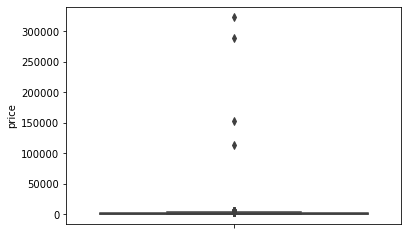

In [214]:
df = df_transactions_val_aberrantes
df

sns.boxplot( y=df_transactions_val_aberrantes["price"] )
plt.show()

Nous voyons bien ici que quatre clients sortent du lot. Recherchons ces clients pour ensuite les supprimer et aisni continuer l'étude du comportement des clients.

* Voyons qui sont ces clients:

In [215]:
df_transactions_val_aberrantes_4 = df_transactions_val_aberrantes.sort_values(by='price', ascending=False).head(4)
df_transactions_val_aberrantes_4

,client_id,price
677,c_1609,324033.35
4388,c_4958,289760.34
6337,c_6714,153598.92
2724,c_3454,113637.93


In [216]:
val_aberrantes_4 = df_transactions_val_aberrantes_4['client_id'].tolist()
val_aberrantes_4

['c_1609', 'c_4958', 'c_6714', 'c_3454']

In [217]:
total_transactions = df_transactions_val_aberrantes['price'].sum()
total_transactions

11853728.679999998

In [218]:
total_ca_val_aberrantes_4 = df_transactions_val_aberrantes_4['price'].sum()
total_ca_val_aberrantes_4

881030.5399999998

In [219]:
total_transactions - total_ca_val_aberrantes_4

10972698.139999999

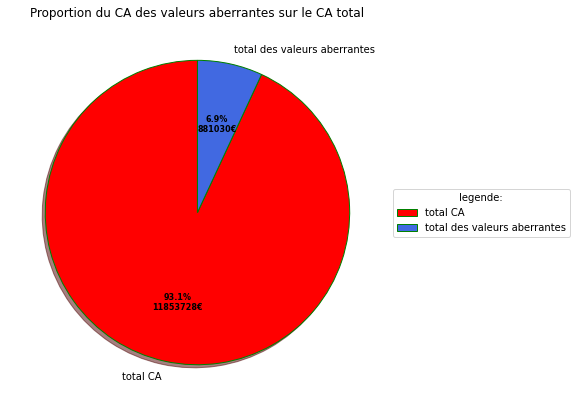

In [220]:
total_ca = ['total CA','total des valeurs aberrantes'] 
  
data = [total_transactions, total_ca_val_aberrantes_4] 
  
colors = ( "red", "royalblue") 
  
wp = { 'linewidth' : 1, 'edgecolor' : "green" } 
  
def func(pct, allvalues): 
    absolute = int(pct / 100.*np.sum(allvalues)) 
    return "{:.1f}%\n{:d}€".format(pct, absolute) 
  
fig, ax = plt.subplots(figsize =(10, 7)) 
wedges, texts, autotexts = ax.pie(data,  
                                  autopct = lambda pct: func(pct, data),   
                                  labels = total_ca, 
                                  shadow = True, 
                                  colors = colors, 
                                  startangle = 90, 
                                  wedgeprops = wp, 
                                  textprops = dict(color ="black")) 
  
ax.legend(wedges, total_ca, 
          title ="legende:", 
          loc ="center left", 
          bbox_to_anchor =(1, 0, 0.5, 1)) 
  
plt.setp(autotexts, size = 8, weight ="bold") 
ax.set_title("Proportion du CA des valeurs aberrantes sur le CA total") 
  
plt.show() 

Les quatre clients sont capables à eux seuls de produire 6.9% du chiffre d'affaires total. Ils n'ont pas un comportement de clients lambda donc nous allons les écarter pour la suite de l'étude.

* Observons également leurs fréquences d'achats:

In [221]:
df_transactions_clients_4 = df_transactions_all.loc[(df_transactions_all['client_id']=='c_1609') | (df_transactions_all['client_id']=='c_4958') | (df_transactions_all['client_id']=='c_6714') | (df_transactions_all['client_id']=='c_3454')]
df_transactions_clients_4

,id_prod,date,session_id,client_id,price,categ,sex,birth
2,0_1277,2022-06-18 15:44:33.155329,s_225667,c_6714,7.99,0,f,1968
17,1_661,2022-09-13 10:18:02.746197,s_267366,c_6714,22.99,1,f,1968
32,1_426,2021-06-21 17:47:57.023863,s_51846,c_4958,19.44,1,m,1999
63,1_506,2021-09-29 03:52:29.731798,s_97203,c_4958,13.65,1,m,1999
67,0_1446,2022-10-05 07:43:00.225116,s_278030,c_1609,8.09,0,m,1980
...,...,...,...,...,...,...,...,...
679229,0_1419,2021-04-02 13:23:57.034357,s_14951,c_1609,8.99,0,m,1980
679253,2_185,2021-03-08 01:39:03.755607,s_3255,c_4958,43.99,2,m,1999
679290,0_1609,2021-10-15 16:58:58.818380,s_105230,c_6714,18.99,0,f,1968
679302,0_1442,2022-07-24 00:48:15.130619,s_242786,c_6714,4.89,0,f,1968


In [222]:
df_transactions_clients_4.groupby(by='client_id', as_index=False).agg({'date': pd.Series.nunique})

,client_id,date
0,c_1609,25488
1,c_3454,6770
2,c_4958,5195
3,c_6714,9181


In [223]:
fréquence_achat_clients = df_transactions_all.groupby(by='client_id', as_index=False).agg({'date': pd.Series.nunique})
fréquence_achat_clients = fréquence_achat_clients[fréquence_achat_clients.client_id.isin(val_aberrantes_4) == False]
fréquence_achat_clients

,client_id,date
0,c_1,39
1,c_10,58
2,c_100,8
3,c_1000,125
4,c_1001,102
...,...,...
8595,c_995,14
8596,c_996,95
8597,c_997,59
8598,c_998,53


* Moyenne de fréquence d'achats par client:

In [224]:
fréquence_achat_clients['date'].mean()

73.57805956258726

Les clients ayant un comportement inhabituel, ont une fréquence d'achat entre 100 et plus de 300 fois superieur au client lambda. Donc nous allons supprimer ces clients_id à la prochaine étape pour avoir une comprehension plus juste du comportement des clients. 

* Mise en place de la table avec les valeurs dont nous aurons besoin:

In [225]:
df_transactions_lien = df_transactions_all.copy()

In [226]:
df_transactions_lien['date1'] = df_transactions_lien['date'].dt.strftime('%Y')
df_transactions_lien

,id_prod,date,session_id,client_id,price,categ,sex,birth,date1
0,0_1518,2022-05-20 13:21:29.043970,s_211425,c_103,4.18,0,f,1986,2022
1,1_251,2022-02-02 07:55:19.149409,s_158752,c_8534,15.99,1,m,1988,2022
2,0_1277,2022-06-18 15:44:33.155329,s_225667,c_6714,7.99,0,f,1968,2022
3,2_209,2021-06-24 04:19:29.835891,s_52962,c_6941,69.99,2,m,2000,2021
4,0_1509,2023-01-11 08:22:08.194479,s_325227,c_4232,4.99,0,m,1980,2023
...,...,...,...,...,...,...,...,...,...
679327,0_1551,2022-01-15 13:05:06.246925,s_150195,c_8489,12.99,0,f,1951,2022
679328,1_639,2022-03-19 16:03:23.429229,s_181434,c_4370,10.99,1,f,1977,2022
679329,0_1425,2022-12-20 04:33:37.584749,s_314704,c_304,12.99,0,f,1988,2022
679330,0_1994,2021-07-16 20:36:35.350579,s_63204,c_2227,4.98,0,m,1986,2021


In [227]:
df_transactions_lien['date1']=df_transactions_lien['date1'].astype(int)
df_transactions_lien['birth']=df_transactions_lien['birth'].astype(int)

In [228]:
df_transactions_lien['age'] = df_transactions_lien['date1'] - df_transactions_lien['birth']
df_transactions_lien

,id_prod,date,session_id,client_id,price,categ,sex,birth,date1,age
0,0_1518,2022-05-20 13:21:29.043970,s_211425,c_103,4.18,0,f,1986,2022,36
1,1_251,2022-02-02 07:55:19.149409,s_158752,c_8534,15.99,1,m,1988,2022,34
2,0_1277,2022-06-18 15:44:33.155329,s_225667,c_6714,7.99,0,f,1968,2022,54
3,2_209,2021-06-24 04:19:29.835891,s_52962,c_6941,69.99,2,m,2000,2021,21
4,0_1509,2023-01-11 08:22:08.194479,s_325227,c_4232,4.99,0,m,1980,2023,43
...,...,...,...,...,...,...,...,...,...,...
679327,0_1551,2022-01-15 13:05:06.246925,s_150195,c_8489,12.99,0,f,1951,2022,71
679328,1_639,2022-03-19 16:03:23.429229,s_181434,c_4370,10.99,1,f,1977,2022,45
679329,0_1425,2022-12-20 04:33:37.584749,s_314704,c_304,12.99,0,f,1988,2022,34
679330,0_1994,2021-07-16 20:36:35.350579,s_63204,c_2227,4.98,0,m,1986,2021,35


In [229]:
bins = [16, 25, 35, 45, 55, 65, 94]
df_transactions_lien['intervale_age'] = pd.cut(df_transactions_lien['age'], bins)
df_transactions_lien

,id_prod,date,session_id,client_id,price,categ,sex,birth,date1,age,intervale_age
0,0_1518,2022-05-20 13:21:29.043970,s_211425,c_103,4.18,0,f,1986,2022,36,"(35, 45]"
1,1_251,2022-02-02 07:55:19.149409,s_158752,c_8534,15.99,1,m,1988,2022,34,"(25, 35]"
2,0_1277,2022-06-18 15:44:33.155329,s_225667,c_6714,7.99,0,f,1968,2022,54,"(45, 55]"
3,2_209,2021-06-24 04:19:29.835891,s_52962,c_6941,69.99,2,m,2000,2021,21,"(16, 25]"
4,0_1509,2023-01-11 08:22:08.194479,s_325227,c_4232,4.99,0,m,1980,2023,43,"(35, 45]"
...,...,...,...,...,...,...,...,...,...,...,...
679327,0_1551,2022-01-15 13:05:06.246925,s_150195,c_8489,12.99,0,f,1951,2022,71,"(65, 94]"
679328,1_639,2022-03-19 16:03:23.429229,s_181434,c_4370,10.99,1,f,1977,2022,45,"(35, 45]"
679329,0_1425,2022-12-20 04:33:37.584749,s_314704,c_304,12.99,0,f,1988,2022,34,"(25, 35]"
679330,0_1994,2021-07-16 20:36:35.350579,s_63204,c_2227,4.98,0,m,1986,2021,35,"(25, 35]"


* Suppression des clients responsables des valeurs aberrantes:

In [230]:
df_transactions_lien = df_transactions_lien[df_transactions_lien.client_id.isin(val_aberrantes_4) == False]
df_transactions_lien

,id_prod,date,session_id,client_id,price,categ,sex,birth,date1,age,intervale_age
0,0_1518,2022-05-20 13:21:29.043970,s_211425,c_103,4.18,0,f,1986,2022,36,"(35, 45]"
1,1_251,2022-02-02 07:55:19.149409,s_158752,c_8534,15.99,1,m,1988,2022,34,"(25, 35]"
3,2_209,2021-06-24 04:19:29.835891,s_52962,c_6941,69.99,2,m,2000,2021,21,"(16, 25]"
4,0_1509,2023-01-11 08:22:08.194479,s_325227,c_4232,4.99,0,m,1980,2023,43,"(35, 45]"
5,0_1418,2022-10-20 15:59:16.084030,s_285425,c_1478,8.57,0,f,1972,2022,50,"(45, 55]"
...,...,...,...,...,...,...,...,...,...,...,...
679327,0_1551,2022-01-15 13:05:06.246925,s_150195,c_8489,12.99,0,f,1951,2022,71,"(65, 94]"
679328,1_639,2022-03-19 16:03:23.429229,s_181434,c_4370,10.99,1,f,1977,2022,45,"(35, 45]"
679329,0_1425,2022-12-20 04:33:37.584749,s_314704,c_304,12.99,0,f,1988,2022,34,"(25, 35]"
679330,0_1994,2021-07-16 20:36:35.350579,s_63204,c_2227,4.98,0,m,1986,2021,35,"(25, 35]"


### Lien entre le genre d’un client et les catégories des livres achetés:

* Création de la table avec le sex et le nombre de clients femmes et d'hommes par catégorie:

In [231]:
df_transactions_sex_categ = df_transactions_lien.groupby('sex')['categ'].value_counts()
df_transactions_sex_categ

sex  categ
f    0        200793
     1        111331
     2         16980
m    0        186488
     1        101017
     2         15868
Name: categ, dtype: int64

In [232]:
data={'nb_ventes_par_sex':df_transactions_sex_categ}
df_transactions_sex_categ_nb_total = pd.DataFrame(data=data)
df_transactions_sex_categ_nb_total = df_transactions_sex_categ_nb_total.reset_index()
df_transactions_sex_categ_nb_total

,sex,categ,nb_ventes_par_sex
0,f,0,200793
1,f,1,111331
2,f,2,16980
3,m,0,186488
4,m,1,101017
5,m,2,15868


In [233]:
vente_femme_catg = df_transactions_sex_categ_nb_total.loc[df_transactions_sex_categ_nb_total['sex']=='f']
vente_homme_catg = df_transactions_sex_categ_nb_total.loc[df_transactions_sex_categ_nb_total['sex']=='m']

* Visualisation de différence de nombre de ventes homme/femme par catégorie:

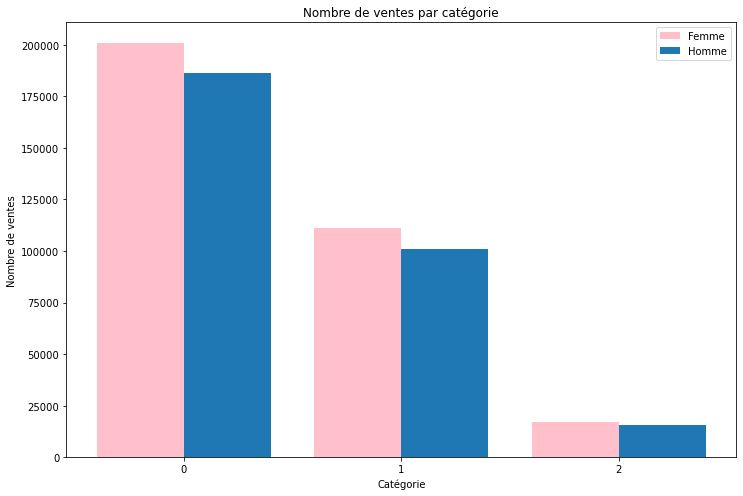

<Figure size 432x288 with 0 Axes>

In [234]:
fig = plt.subplots(figsize =(12, 8))
X = vente_femme_catg['categ']
Ygirls = vente_femme_catg['nb_ventes_par_sex']
Zboys = vente_homme_catg['nb_ventes_par_sex']
  
X_axis = np.arange(len(X))
  
plt.bar(X_axis - 0.2, Ygirls, 0.4, label = 'Femme', color='pink')
plt.bar(X_axis + 0.2, Zboys, 0.4, label = 'Homme')
  
plt.xticks(X_axis, X)
plt.xlabel("Catégorie")
plt.ylabel("Nombre de ventes")
plt.title("Nombre de ventes par catégorie")
plt.legend()
plt.show()
save_results_to = "/Users/Utilisateur/OneDrive/Images/"

plt.savefig(save_results_to + 'image.png', dpi = 300)

On peut voir ici que l'égalité entre les hommes et les femmes est pratiquement parfaite au niveau des achats par catégorie. La catégorie 0 est celle qui à le plus de succès, vients ensuite la catégorie 1, puis la 2.

* Confirmons cela à l'aide d'un test statistique:

Identification des critères :

    -Nature des variables: Qualitatives (colonnes:sex et categ)
   
    -Nombre de groupes: 3
    
    -Appariement ou indépendance des groupes: indépendance
     
    -Taille: >30 échantillons 
    

*Le test  du Chi-2 est le plus souvent utilisé sur des tailles d'échantillons>5 et ayant ses variables qualitatives.*

Une des conditions pour utiliser ce test, est de vérifier la normalité de la distribution:

* test de normalité:

On pose les hypothèses de départ :

    H0 : la distribution suit une loi normale si p-value > 5%
    H1 : la distribution ne suit pas une loi normale si p-value < 5%

In [235]:
stats.jarque_bera(df_transactions_lien['price'])

Jarque_beraResult(statistic=54155908.61815644, pvalue=0.0)

Nous avons ici une pvalue<0.05 donc l'hypothèse H0 est rejetée et nous ne pourrons donc pas effectué de test sous la condition ou la distribution suit une loi normale.

On effectuera donc un test non paramétrique.

*Les tests du Khi-deux sont des tests d'hypothèses non paramétriques qui comparent des distributions entre elles.*

* Table de contingence pour observer la dépendance entre le sex et la catégorie:

In [236]:
contingency_table = pd.crosstab(df_transactions_lien['sex'],df_transactions_lien['categ'])
print(contingency_table)

categ       0       1      2
sex                         
f      200793  111331  16980
m      186488  101017  15868


* Test du khi 2:

Hypothèses:

    H0 = Il n'y a pas de dépendance donc aucun lien entre le sex et la catégorie de livres achetés si pvalue>5%
    H1 = Il y a une dépendance donc un lien entre le sex et la catégorie de livres achetés si pvalue<5%

In [284]:
H0 = "Il n'y a pas de dépendance donc aucun lien entre le sex et la catégorie de livres achetés."
H1 = "Il y a une dépendance donc un lien entre le sex et la catégorie de livres achetés."
Khi2_obs, p_value, degré_de_liberte, effectif_theorique = chi2_contingency(contingency_table)
print('La p_value est égale à:', p_value)
if p_value>0.05: print(H0)
else: print(H1)

La p_value est égale à: 4.080400389217356e-05
Il y a une dépendance donc un lien entre le sex et la catégorie de livres achetés.


### Lien entre l’âge des clients et le montant total des achats:

In [238]:
df_lien_age_montant_total = df_transactions_lien.copy()

In [239]:
df_lien_age_montant_total = df_lien_age_montant_total.drop(columns=['birth','date1','age'])
df_lien_age_montant_total

,id_prod,date,session_id,client_id,price,categ,sex,intervale_age
0,0_1518,2022-05-20 13:21:29.043970,s_211425,c_103,4.18,0,f,"(35, 45]"
1,1_251,2022-02-02 07:55:19.149409,s_158752,c_8534,15.99,1,m,"(25, 35]"
3,2_209,2021-06-24 04:19:29.835891,s_52962,c_6941,69.99,2,m,"(16, 25]"
4,0_1509,2023-01-11 08:22:08.194479,s_325227,c_4232,4.99,0,m,"(35, 45]"
5,0_1418,2022-10-20 15:59:16.084030,s_285425,c_1478,8.57,0,f,"(45, 55]"
...,...,...,...,...,...,...,...,...
679327,0_1551,2022-01-15 13:05:06.246925,s_150195,c_8489,12.99,0,f,"(65, 94]"
679328,1_639,2022-03-19 16:03:23.429229,s_181434,c_4370,10.99,1,f,"(35, 45]"
679329,0_1425,2022-12-20 04:33:37.584749,s_314704,c_304,12.99,0,f,"(25, 35]"
679330,0_1994,2021-07-16 20:36:35.350579,s_63204,c_2227,4.98,0,m,"(25, 35]"


In [240]:
df_lien_age_montant_total['intervale_age']=df_lien_age_montant_total['intervale_age'].astype(str)

In [241]:
df_lien_age_montant_total_tab = df_lien_age_montant_total.groupby(['intervale_age']).sum()
df_lien_age_montant_total_tab = df_lien_age_montant_total_tab.reset_index()
df_lien_age_montant_total_tab

,intervale_age,price
0,"(16, 25]",1990501.26
1,"(25, 35]",2389579.20
2,"(35, 45]",2753743.23
3,"(45, 55]",1855367.81
4,"(55, 65]",1071809.60
5,"(65, 94]",911697.04


Nous observons que selon l'age le montant total d'achat varie. Les clients qui ont entre 25 et 45 ans sont ceux qui dépensent le plus.

* Confirmons cela à l'aide d'un test statistique:

Procédons de meme que precédemment:

Identification des critères :

    -Nature des variables: quantitatives (colonne:price, intervale_age)
   
    -Nombre de groupes: 2
    
    -Appariement ou indépendance des groupes: indépendance
     
    -Taille: >30 échantillons 

*Le test le plus adapté correspondant aux critères observés serait le test de Pearson.*

* Création de la table age en fonction du total des achats:

In [242]:
df_lien_age_montant_total_tab1 = df_transactions_lien.groupby(['age']).sum()
df_lien_age_montant_total_tab1 = df_lien_age_montant_total_tab1.reset_index()
df_lien_age_montant_total_tab1 = df_lien_age_montant_total_tab1.drop(columns=['birth','date1'])
df_lien_age_montant_total_tab1 = df_lien_age_montant_total_tab1.rename(columns={'price': 'montant_total_dépensé'})
df_lien_age_montant_total_tab1

,age,montant_total_dépensé
0,17,241265.83
1,18,384592.43
2,19,221900.10
3,20,177105.28
4,21,172091.75
...,...,...
73,90,4114.03
74,91,3455.02
75,92,3309.62
76,93,2115.62


* Visualisation de la corrélation entre les deux variables:

Text(0.5, 1.0, "Montant total dépensé en fonction de l'age")

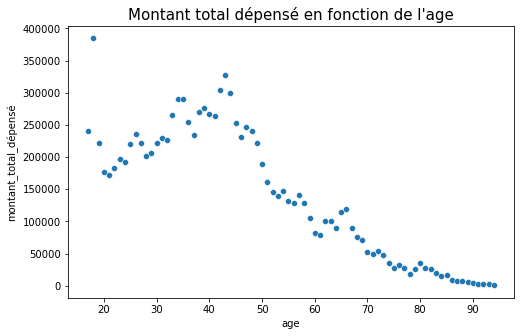

In [243]:
fig = plt.subplots(figsize =(8, 5))
sns.scatterplot(data=df_lien_age_montant_total_tab1,x='age',y='montant_total_dépensé')
plt.title("Montant total dépensé en fonction de l'age",fontsize = 15)

*La tendance observé ici est que plus l'age augmente plus le montant total dépensé diminue.*

* Visualisation de la distribution:

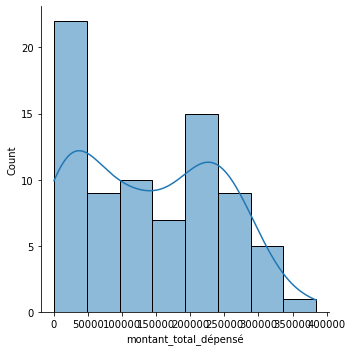

In [244]:
sns.displot(df_lien_age_montant_total_tab1['montant_total_dépensé'], kde=True)

* test de normalité:

On pose les hypothèses de départ :

    H0 : la distribution suit une loi normale si p-value > 5%
    H1 : la distribution ne suit pas une loi normale si p-value < 5%

In [245]:
stats.shapiro(df_lien_age_montant_total_tab1['montant_total_dépensé'])

ShapiroResult(statistic=0.9319976568222046, pvalue=0.00044126235297881067)

Ici p_value<0.05 donc la distribution ne suit pas une loi normale. Nous appliquerons donc un test non-paramétrique.

Nous ne pourrons pas utiliser le test de Pearson, donc nous allons utiliser l'équivalent en test non-paramétrique qui est le test de Spearman.

Voici les hypothèses:
                                             
    H0 : Il n'y a pas de corrélation entre l'age et le montant total dépensé si p-value > 5%
    H1 : Il y a une corrélation entre l'age et le montant total dépensé si p-value < 5%

In [246]:
stats.spearmanr(df_lien_age_montant_total_tab1['age'],df_lien_age_montant_total_tab1['montant_total_dépensé'])

SpearmanrResult(correlation=-0.880650994575045, pvalue=2.2726375291382067e-26)

p_value<0.05 donc H0 rejetée. Il y a donc une corrélation entre l'age et le montant total dépensé.

Le coefficient de Spearman etant négatif, nous avons donc une tendance de corrélation décroissante.

### Lien entre l’âge des clients et le panier moyen:

In [247]:
df_lien_age_panier_moyen = df_transactions_lien.copy()

In [248]:
df_lien_age_panier_moyen = df_lien_age_panier_moyen.drop(columns=['birth','date1'])
df_lien_age_panier_moyen

,id_prod,date,session_id,client_id,price,categ,sex,age,intervale_age
0,0_1518,2022-05-20 13:21:29.043970,s_211425,c_103,4.18,0,f,36,"(35, 45]"
1,1_251,2022-02-02 07:55:19.149409,s_158752,c_8534,15.99,1,m,34,"(25, 35]"
3,2_209,2021-06-24 04:19:29.835891,s_52962,c_6941,69.99,2,m,21,"(16, 25]"
4,0_1509,2023-01-11 08:22:08.194479,s_325227,c_4232,4.99,0,m,43,"(35, 45]"
5,0_1418,2022-10-20 15:59:16.084030,s_285425,c_1478,8.57,0,f,50,"(45, 55]"
...,...,...,...,...,...,...,...,...,...
679327,0_1551,2022-01-15 13:05:06.246925,s_150195,c_8489,12.99,0,f,71,"(65, 94]"
679328,1_639,2022-03-19 16:03:23.429229,s_181434,c_4370,10.99,1,f,45,"(35, 45]"
679329,0_1425,2022-12-20 04:33:37.584749,s_314704,c_304,12.99,0,f,34,"(25, 35]"
679330,0_1994,2021-07-16 20:36:35.350579,s_63204,c_2227,4.98,0,m,35,"(25, 35]"


* Création de la table age en fonction du panier moyen:

In [249]:
df_lien_age_panier_moyen = df_lien_age_panier_moyen.groupby(['intervale_age']).mean()
df_lien_age_panier_moyen = df_lien_age_panier_moyen.reset_index()
df_lien_age_panier_moyen = df_lien_age_panier_moyen.drop(columns=['age'])
df_lien_age_panier_moyen = df_lien_age_panier_moyen.rename(columns={'price':'panier_moyen'})
df_lien_age_panier_moyen

,intervale_age,panier_moyen
0,"(16, 25]",40.234093
1,"(25, 35]",18.496054
2,"(35, 45]",13.256358
3,"(45, 55]",14.512521
4,"(55, 65]",16.786894
5,"(65, 94]",16.763451


In [250]:
df_lien_age_panier_moyen_tab = df_transactions_lien.groupby(['age']).mean()
df_lien_age_panier_moyen_tab = df_lien_age_panier_moyen_tab.drop(columns=['birth','date1'])
df_lien_age_panier_moyen_tab = df_lien_age_panier_moyen_tab.rename(columns={'price':'panier_moyen'})
df_lien_age_panier_moyen_tab = df_lien_age_panier_moyen_tab.reset_index()                                                    
df_lien_age_panier_moyen_tab

,age,panier_moyen
0,17,40.651361
1,18,39.912041
2,19,41.031823
3,20,39.978619
4,21,39.974855
...,...,...
73,90,16.930165
74,91,16.452476
75,92,16.885816
76,93,16.400155


* Visualisation de la corrélation entre les deux variables:

Text(0.5, 1.0, "Panier moyen en fonction de l'age")

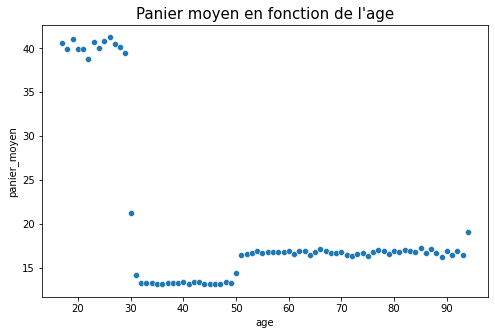

In [251]:
fig = plt.subplots(figsize =(8, 5))
sns.scatterplot(data=df_lien_age_panier_moyen_tab,x='age',y='panier_moyen')
plt.title("Panier moyen en fonction de l'age",fontsize = 15)

Nous observons qu'il n'y a pas vraiment de lien entre l'age et le panier moyen. Prouvons cela à l'aide d'un test statistique.

Procédons de meme que precédemment:

Identification des critères :

    -Nature des variables: quantitatives (colonnes:panier_moyen, age)
   
    -Nombre de groupes: 2
    
    -Appariement ou indépendance des groupes: indépendance
     
    -Taille: >30 échantillons 

Le test le plus adapté correspondant aux critères observés serait le test Corrélation de Pearson.

* Visualisation de la distribution:

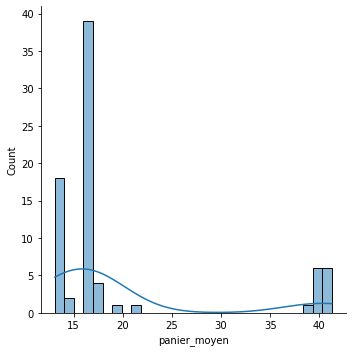

In [252]:
sns.displot(df_lien_age_panier_moyen_tab['panier_moyen'], kde=True)

* Test de normalité:

In [253]:
stats.jarque_bera(df_lien_age_panier_moyen_tab['panier_moyen'])

Jarque_beraResult(statistic=39.517946084236826, pvalue=2.622932093743202e-09)

Ici p_value<0.05 donc la distribution ne suit pas une loi normale. Nous appliquerons donc un test non-paramétrique.

Nous ne pourrons pas utiliser le test de Pearson, donc nous allons utiliser l'équivalent en test non-paramétrique qui est le test de Spearman.

In [254]:
stats.spearmanr(df_lien_age_panier_moyen_tab['age'],df_lien_age_panier_moyen_tab['panier_moyen'])

SpearmanrResult(correlation=-0.06594671151633177, pvalue=0.5662065053602863)

p_value>0.05 donc H0 acceptée. Il n'y a donc aucune dépendance entre l'age et le panier moyen.

### Lien entre l’âge des clients et la fréquence d'achat:

Nombre de dates par transaction:

In [255]:
df_transactions_lien['date'].nunique()

632477

In [256]:
df_transactions_lien_age_frequence = df_transactions_lien.groupby(by='intervale_age', as_index=False).agg({'date': pd.Series.nunique})
df_transactions_lien_age_frequence

,intervale_age,date
0,"(16, 25]",49473
1,"(25, 35]",129194
2,"(35, 45]",207730
3,"(45, 55]",127846
4,"(55, 65]",63848
5,"(65, 94]",54386


In [257]:
df_transactions_lien_age_frequence['date'].sum()

632477

Fréquence d'achat par tranches d'age:

* Fréquence d'achat annuelle:

In [258]:
df_transactions_lien_age_frequence = df_transactions_lien_age_frequence.rename(columns={'date':'achat_par_an'})
df_transactions_lien_age_frequence

,intervale_age,achat_par_an
0,"(16, 25]",49473
1,"(25, 35]",129194
2,"(35, 45]",207730
3,"(45, 55]",127846
4,"(55, 65]",63848
5,"(65, 94]",54386


* Fréquence d'achat mensuelle:

In [259]:
df_transactions_lien_age_frequence['achat_par_mois'] = df_transactions_lien_age_frequence['achat_par_an']/12
df_transactions_lien_age_frequence

,intervale_age,achat_par_an,achat_par_mois
0,"(16, 25]",49473,4122.750000
1,"(25, 35]",129194,10766.166667
2,"(35, 45]",207730,17310.833333
3,"(45, 55]",127846,10653.833333
4,"(55, 65]",63848,5320.666667
5,"(65, 94]",54386,4532.166667


* Fréquence d'achat journalière:

In [260]:
df_transactions_lien_age_frequence['achat_par_jour'] = df_transactions_lien_age_frequence['achat_par_mois']/30
df_transactions_lien_age_frequence

,intervale_age,achat_par_an,achat_par_mois,achat_par_jour
0,"(16, 25]",49473,4122.750000,137.425000
1,"(25, 35]",129194,10766.166667,358.872222
2,"(35, 45]",207730,17310.833333,577.027778
3,"(45, 55]",127846,10653.833333,355.127778
4,"(55, 65]",63848,5320.666667,177.355556
5,"(65, 94]",54386,4532.166667,151.072222


Fréquence d'achat par age:

In [261]:
df_transactions_lien_age_frequence_tab = df_transactions_lien.groupby(by='age', as_index=False).agg({'date': pd.Series.nunique})
df_transactions_lien_age_frequence_tab

,age,date
0,17,5935
1,18,9636
2,19,5408
3,20,4430
4,21,4305
...,...,...
73,90,243
74,91,210
75,92,196
76,93,129


In [262]:
df_transactions_lien_age_frequence_tab = df_transactions_lien_age_frequence_tab.rename(columns={'date':'achat_par_an'})
df_transactions_lien_age_frequence_tab

,age,achat_par_an
0,17,5935
1,18,9636
2,19,5408
3,20,4430
4,21,4305
...,...,...
73,90,243
74,91,210
75,92,196
76,93,129


In [263]:
df_transactions_lien_age_frequence_tab['achat_par_mois'] = df_transactions_lien_age_frequence_tab['achat_par_an']/12
df_transactions_lien_age_frequence_tab

,age,achat_par_an,achat_par_mois
0,17,5935,494.583333
1,18,9636,803.000000
2,19,5408,450.666667
3,20,4430,369.166667
4,21,4305,358.750000
...,...,...,...
73,90,243,20.250000
74,91,210,17.500000
75,92,196,16.333333
76,93,129,10.750000


In [264]:
df_transactions_lien_age_frequence_tab['achat_par_jour'] = df_transactions_lien_age_frequence_tab['achat_par_mois']/30
df_transactions_lien_age_frequence_tab

,age,achat_par_an,achat_par_mois,achat_par_jour
0,17,5935,494.583333,16.486111
1,18,9636,803.000000,26.766667
2,19,5408,450.666667,15.022222
3,20,4430,369.166667,12.305556
4,21,4305,358.750000,11.958333
...,...,...,...,...
73,90,243,20.250000,0.675000
74,91,210,17.500000,0.583333
75,92,196,16.333333,0.544444
76,93,129,10.750000,0.358333


* Visualisation de la corrélation entre les deux variables:

Text(0.5, 1.0, "Fréquence d'achat en fonction de l'age")

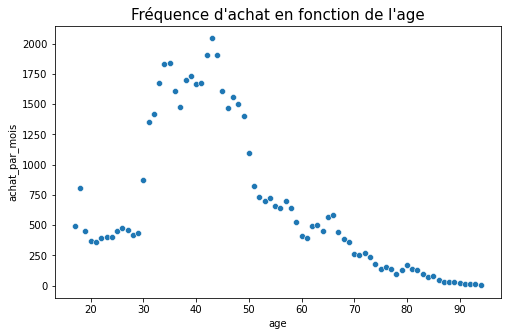

In [265]:
fig = plt.subplots(figsize =(8, 5))
sns.scatterplot(data=df_transactions_lien_age_frequence_tab,x='age',y='achat_par_mois')
plt.title("Fréquence d'achat en fonction de l'age",fontsize = 15)

Nous voyons bien que selon l'age, la fréquence d'achat diffère. Plus les clients sont agés et moins la fréquence d'achat sera élevée.

Procédons de meme que precédemment:

Identification des critères :

    -Nature des variables: quantitatives (colonnes: age et achat_par_mois)
   
    -Nombre de groupes: 2
    
    -Appariement ou indépendance des groupes: indépendance
     
    -Taille: >30 échantillons 

* Visualisation de la distribution:

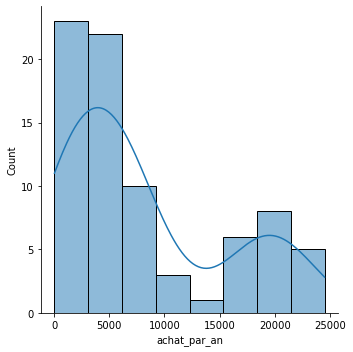

In [266]:
sns.displot(df_transactions_lien_age_frequence_tab['achat_par_an'], kde=True)

* Test de normalité:

In [267]:
stats.shapiro(df_transactions_lien_age_frequence_tab['achat_par_mois'])

ShapiroResult(statistic=0.8546953797340393, pvalue=3.0688067909068195e-07)

Ici p_value<0.05 donc la distribution ne suit pas une loi normale. Nous appliquerons donc un test non-paramétrique.

In [268]:
stats.spearmanr(df_transactions_lien_age_frequence_tab['age'],df_transactions_lien_age_frequence_tab['achat_par_mois'])

SpearmanrResult(correlation=-0.692560603953009, pvalue=2.1544693561492573e-12)

p_value<0.05 donc H0 rejetée. Il y a donc une dépendance entre l'age et la fréquence d'achat.

Le coefficient de Spearman etant négatif, nous avons donc une tendance de corrélation décroissante.

### Lien entre l’âge des clients et la catégorie des livres achetés:

* Création de la table du nombre d'achat par intervale_age en fonction de la catégorie:

In [269]:
df_transactions_lien_age_categ = df_transactions_lien.groupby('intervale_age')['categ'].value_counts()
df_transactions_lien_age_categ

intervale_age  categ
(16, 25]       2         19695
               1         18526
               0         11252
(25, 35]       0         85270
               1         33330
               2         10594
(35, 45]       0        157581
               1         49401
               2           748
(45, 55]       0         81960
               1         45149
               2           737
(55, 65]       1         35448
               0         27823
               2           577
(65, 94]       1         30494
               0         23395
               2           497
Name: categ, dtype: int64

In [270]:
data={'nb_ventes_par_cat':df_transactions_lien_age_categ}
df_transactions_lien_age_categ_nb_total = pd.DataFrame(data=data)
df_transactions_lien_age_categ_nb_total = df_transactions_lien_age_categ_nb_total.reset_index()
df_transactions_lien_age_categ_nb_total

,intervale_age,categ,nb_ventes_par_cat
0,"(16, 25]",2,19695
1,"(16, 25]",1,18526
2,"(16, 25]",0,11252
3,"(25, 35]",0,85270
4,"(25, 35]",1,33330
5,"(25, 35]",2,10594
6,"(35, 45]",0,157581
7,"(35, 45]",1,49401
8,"(35, 45]",2,748
9,"(45, 55]",0,81960


* Visualisation de la corrélation entre les deux variables:

In [271]:
data_cate = df_transactions_lien_age_categ_nb_total.copy()

In [272]:
data_cate['intervale_age']=data_cate['intervale_age'].astype(str)

In [273]:
data_cate_0 = data_cate.loc[data_cate['categ']==0]
data_cate_1 = data_cate.loc[data_cate['categ']==1]
data_cate_2 = data_cate.loc[data_cate['categ']==2]

Text(0.5, 1.0, "Fréquence d'achat en fonction de l'age")

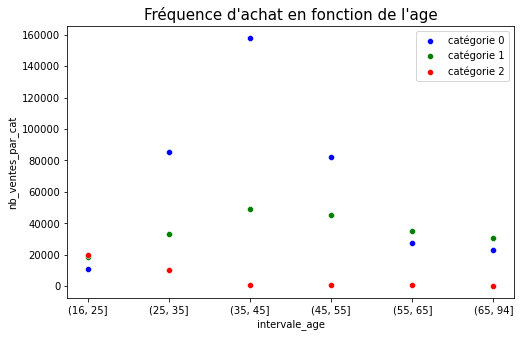

In [274]:
fig = plt.subplots(figsize =(8, 5))
sns.scatterplot(data=data_cate_0,x='intervale_age',y='nb_ventes_par_cat', color='b', label='catégorie 0')
sns.scatterplot(data=data_cate_1,x='intervale_age',y='nb_ventes_par_cat', color='g', label='catégorie 1')
sns.scatterplot(data=data_cate_2,x='intervale_age',y='nb_ventes_par_cat', color='r', label='catégorie 2')
plt.legend()
plt.title("Fréquence d'achat en fonction de l'age",fontsize = 15)

Selon la catégorie nous avons plus ou moins de ventes par intervale d'age. On observe bien ici que par tranche d'age nous avons un classement des catégories qui difère. Les plus jeunes sont ceux qui consomment le plus la catégorie 1 et le résultat s'inverse autour de 25 ans. Nous avons également une tendance qui s'inverse après 55 ans ou l'on peut voir que la catégorie 1 repasse devant la catégorie 0.

* Visualisation de la distribution:

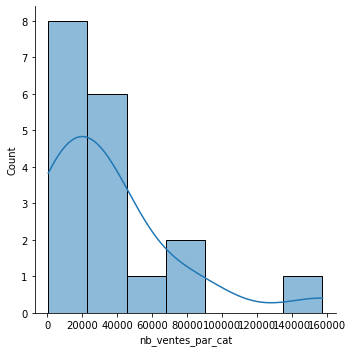

In [275]:
sns.displot(df_transactions_lien_age_categ_nb_total['nb_ventes_par_cat'], kde=True)

* Table de contingence pour observer la dépendance entre l'age et la catégorie:

In [276]:
contingency_table1 = pd.crosstab(df_transactions_lien['intervale_age'],df_transactions_lien['categ'])
print(contingency_table1)

categ               0      1      2
intervale_age                      
(16, 25]        11252  18526  19695
(25, 35]        85270  33330  10594
(35, 45]       157581  49401    748
(45, 55]        81960  45149    737
(55, 65]        27823  35448    577
(65, 94]        23395  30494    497


In [277]:
df_transactions_lien_age_categ_nb_total['intervale_age']=df_transactions_lien_age_categ_nb_total['intervale_age'].astype(str)

Procédons de meme que precédemment:

Identification des critères :

    -Nature des variables: quantitatives (colonne:nb_ventes_par_cat)/qualitatives (colonne:intervale_age)
   
    -Nombre de groupes: 3
    
    -Appariement ou indépendance des groupes: indépendance
     
    -Taille: >30 échantillons 

Le test le plus adapté correspondant aux critères observés serait le test Anova ou t de Student.

Une des 3 conditions de validité d’une ANOVA est de chercher à démontrer que les variances de chaque groupe sont égales:

In [278]:
from scipy.stats import bartlett

In [279]:
bartlett(df_transactions_lien_age_categ_nb_total.nb_ventes_par_cat[df_transactions_lien_age_categ_nb_total.categ == 0],
        df_transactions_lien_age_categ_nb_total.nb_ventes_par_cat[df_transactions_lien_age_categ_nb_total.categ == 1],
        df_transactions_lien_age_categ_nb_total.nb_ventes_par_cat[df_transactions_lien_age_categ_nb_total.categ == 2])

BartlettResult(statistic=18.228871431378472, pvalue=0.00011006541185406653)

Hypothèses:

    H0 : Les variances de chaque groupe sont égales si p-value > 5%
    H1 : Les variances de chaque groupe ne sont pas toutes égales < 5%

Ici p-value<5% donc les variances de chaque groupe ne sont pas toutes égales. Nous ne pourrons pas utilisé le test d'Anova.

* Test de normalité:

In [280]:
stats.jarque_bera(df_transactions_lien_age_categ_nb_total['nb_ventes_par_cat'])

Jarque_beraResult(statistic=17.291665839857345, pvalue=0.00017585813837084352)

In [281]:
stats.shapiro(df_transactions_lien_age_categ_nb_total['nb_ventes_par_cat'])

ShapiroResult(statistic=0.7895658612251282, pvalue=0.001085871015675366)

Ici p_value<0.05 donc la distribution ne suit pas une loi normale. Nous appliquerons donc un test non-paramétrique.

Le test de Kruskal-Wallis est souvent utilisé comme une alternative à l'ANOVA dans le cas où l'hypothèse de normalité n'est pas acceptable.

* Création des groupes pour le test de Kruskal-Wallis:

In [282]:
g1 = df_transactions_lien_age_categ_nb_total.loc[df_transactions_lien_age_categ_nb_total['categ']==0]
g2 = df_transactions_lien_age_categ_nb_total.loc[df_transactions_lien_age_categ_nb_total['categ']==1]
g3 = df_transactions_lien_age_categ_nb_total.loc[df_transactions_lien_age_categ_nb_total['categ']==2]
g1 = g1['nb_ventes_par_cat']
g2 = g2['nb_ventes_par_cat']
g3 = g3['nb_ventes_par_cat']

Hypothèses:

    H0 = Les différences entre certaines médianes sont statistiquement significatives si pvalue < 5%
    H1 = Les différences entre les médianes ne sont pas statistiquement significatives si pvalue > 5%  

In [283]:
from scipy.stats import kruskal
stats.kruskal(g1,g2,g3)

KruskalResult(statistic=10.187134502923968, pvalue=0.006136091816448039)

pvalue < à 0.05, alors on peut parler de différences significatives. Il y a donc un lien entre l'age et les catégories des livres achetés.